In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.decomposition import PCA

In [5]:
# Installing Deepchem
!pip install --pre deepchem
import deepchem
deepchem.__version__

Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead


'2.8.1.dev'

In [5]:
!pip install pandas
!pip install matplotlib

In [ ]:
import deepchem as dc
# Installing conda
!curl -Lo conda_installer.py https://raw.githubusercontent.com/deepchem/deepchem/master/scripts/colab_install.py
import conda_installer
conda_installer.install()
!/root/miniconda/bin/conda info -e
!pip install scikit-learn


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3457  100  3457    0     0  14365      0 --:--:-- --:--:-- --:--:-- 14344


add /root/miniconda/lib/python3.10/site-packages to PYTHONPATH
INFO:conda_installer:add /root/miniconda/lib/python3.10/site-packages to PYTHONPATH
python version: 3.10.12
INFO:conda_installer:python version: 3.10.12
fetching installer from https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
INFO:conda_installer:fetching installer from https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
done
INFO:conda_installer:done
installing miniconda to /root/miniconda
INFO:conda_installer:installing miniconda to /root/miniconda
done
INFO:conda_installer:done
installing openmm, pdbfixer
INFO:conda_installer:installing openmm, pdbfixer
added conda-forge to channels
INFO:conda_installer:added conda-forge to channels
done
INFO:conda_installer:done
conda packages installation finished!
INFO:conda_installer:conda packages installation finished!


# conda environments:
#
base                     /root/miniconda



In [6]:
import pandas as pd
import deepchem as dc
from deepchem.models import GraphConvModel
from sklearn.model_selection import ParameterGrid
from scipy import stats
from deepchem.metrics import pearson_r2_score
import tensorflow as tf # Import TensorFlow

In [ ]:
file_path = '/content/drive/MyDrive/BBB dataset/test_checkpoints_reg/fold_0/train_full.csv'
train = pd.read_csv(file_path)
train

,smiles,logBB
0,CC(C)(C)C1=CC2=NN=C(N2N=C1OCC3=NC=NN3C)C4=C(C=...,-0.20
1,CN(C)CC1=CC=C(O1)CSCCNC2=C(C(=CN2)CC3=CC=CC=C3...,-0.73
2,C=CCC1=C(C(=CC=C1)/C=N\NC(=O)CN2CCN(CC2)CC3=CC...,-1.67
3,C[NH2+]CCCN1C2=CC=CC=C2CCC3=CC=CC=C31,1.20
4,CC(C)(C)C1=CC(=CC(=C1O)C(C)(C)C)CN2CCN(CC2)CC(...,0.91
...,...,...
832,C1CCN(C1)CCN2C=CC3=C2C=C(C=C3)NC(=O)CC4=CC=C(C...,-0.59
833,CC1=C2C(=CC=C1)[C@@H]3CN(CC[C@@]3(C4=CC=CC=C4O...,0.82
834,CCC(C)N(C)C(=O)C1=CC2=CC=CC=C2C(=N1)C3=CC=CC=C3Cl,0.48
835,CCC(=O)NC1CCC(CC1)CCN2CCN(CC2)C3=C(C(=CC=C3)Cl)Cl,0.90


In [ ]:
file_path = '/content/drive/MyDrive/BBB dataset/test_checkpoints_reg/fold_0/test_full.csv'
test = pd.read_csv(file_path)
test

,smiles,logBB
0,[N-]=[N+]=O,0.03
1,C1=CC(=CC(=C1)C(F)(F)F)/C(=N/OCCCCC(=O)O)/C2=C...,-1.00
2,CC(C)CN(CC(C(CC1=CC=CC=C1)NC(=O)OC2CCOC2)O)S(=...,-0.56
3,C1[C@@H]([C@H]1N)C2=CC=C(C=C2)F,0.81
4,CCCCCC1(C(=O)NC(=O)NC1=O)CC,0.09
...,...,...
100,C(C(F)(F)F)(Cl)Br,0.30
101,C1C2=CN=C(N2C3=C(C=C(C=C3)Cl)C(=N1)C4=CC=CC=C4...,-0.10
102,c1(C(C)C)onc(c4ncn2c4CNC(c3c2cccc3Cl)=O)n1,-0.30
103,CN1CC2C(C1)C3=C(C=CC(=C3)Cl)OC4=CC=CC=C24,1.03


In [ ]:
file_path = '/content/drive/MyDrive/BBB dataset/test_checkpoints_reg/fold_0/val_full.csv'
val = pd.read_csv(file_path)
val

,smiles,logBB
0,C1CCN(CC1)C2=NC(=NC3=C2N=C(N=C3N4CCCCC4)N(CCO)...,0.00
1,CN1CCC[C@H](C1)C2=NC3=CC=CC=C3N2CC4=CC=C(C=C4)F,0.43
2,CC[C@]1(C[C@@H](C2=C([C@H]1O)C(=C3C(=C2O)C(=O)...,0.56
3,CC1=CC=CC=C1C2=C(C=NC=C2)C(=O)N(C)CC3=CC(=CC(=...,0.68
4,CN=C(C[N+](=O)[O-])NCCCSC1=CC=C(O1)CN(C)C,-1.23
...,...,...
100,CC(CC1=CC=CC=C1)N,0.93
101,CN(C1CCN(CC1)CC(COC2=CC(=C(C=C2)F)F)O)C3=NC4=C...,0.59
102,CCC1(CC(C2=C(C1O)C(=C3C(=C2O)C(=O)C4=C(C3=O)C=...,0.56
103,CN(C)C1=[NH+]C=CC(=C1)C2=N[NH]C(=N2)N,-1.17


In [ ]:
file_path = '/content/drive/MyDrive/BBB dataset/df.csv'
df = pd.read_csv(file_path)
df

,smiles,logBB
0,CC1=NC=C(C=C1)CC2CNC(NC2=O)NCCCCC3=NC=C(C=C3C)Br,-1.88
1,c1(c2c3n(c4c(C(N(C)C3)=O)c(Cl)ccc4)cn2)noc(C(O...,-1.82
2,CN1CC2=C(N=CN2C2=CC=CC(Cl)=C2C1=O)C1=NOC(=N1)[...,-1.82
3,C([C@@H]1[C@H]([C@@H]([C@H]([C@H](O1)O[C@]2([C...,-1.70
4,C=CCC1=C(C(=CC=C1)/C=N\NC(=O)CN2CCN(CC2)CC3=CC...,-1.67
...,...,...
1042,C[NH2+]CCCN1C2=CC=CC=C2CCC3=CC=CC=C31,1.20
1043,CN(C)CCCN1C2=CC=CC=C2SC3=CC=CC=C31,1.23
1044,CN(C)CCOC(C1=CC=CC=C1)C2=CC=CC=C2,1.30
1045,CNCCCN1C2=CC=CC=C2SC3=C1C=C(C=C3)Cl,1.40


In [ ]:
!pip install --upgrade deepchem
!pip install --upgrade tensorflow

In [7]:
import tensorflow as tf
print(tf.__version__)
!pip install tensorflow==2.12.0 keras==2.15.0
import os
os.environ['TF_USE_LEGACY_KERAS'] = 'True'
!pip install --upgrade deepchem


2.17.0
  Using cached tensorflow-2.12.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.4 kB)
  Using cached gast-0.4.0-py3-none-any.whl.metadata (1.1 kB)
INFO: pip is looking at multiple versions of tensorflow to determine which version is compatible with other requirements. This could take a while.
ERROR: Cannot install keras==2.15.0 and tensorflow==2.12.0 because these package versions have conflicting dependencies.

The conflict is caused by:
    The user requested keras==2.15.0
    tensorflow 2.12.0 depends on keras<2.13 and >=2.12.0

To fix this you could try to:
1. loosen the range of package versions you've specified
2. remove package versions to allow pip to attempt to solve the dependency conflict

ERROR: ResolutionImpossible: for help visit https://pip.pypa.io/en/latest/topics/dependency-resolution/#dealing-with-dependency-conflicts
^C


In [8]:
import pandas as pd
from deepchem.feat import ConvMolFeaturizer
from deepchem.data import NumpyDataset
import numpy as np
from sklearn.utils import shuffle

In [ ]:
train_size = 732
test_size = 158
valid_size = 157


shuffled_df = shuffle(df, random_state=None)

# Split the dataset
train_df = shuffled_df.iloc[:train_size]
test_df = shuffled_df.iloc[train_size:train_size + test_size]
valid_df = shuffled_df.iloc[train_size + test_size:train_size + test_size + valid_size]

In [ ]:
def load_data(csv_path):
    df =csv_path
    smiles = df['smiles'].values
    targets = df['logBB'].values
    return smiles, targets

train_smiles, train_targets = load_data(train_df)
valid_smiles, valid_targets = load_data(valid_df)
test_smiles, test_targets = load_data(test_df)

# Initialize featurizer
featurizer = ConvMolFeaturizer()

# Convert data to DeepChem format
train_feats = featurizer.featurize(train_smiles)
valid_feats = featurizer.featurize(valid_smiles)
test_feats = featurizer.featurize(test_smiles)

train_dataset = NumpyDataset(train_feats, train_targets)
valid_dataset = NumpyDataset(valid_feats, valid_targets)
test_dataset = NumpyDataset(test_feats, test_targets)

In [ ]:
def load_data(csv_path):
    df =csv_path
    smiles = df['smiles'].values
    targets = df['logBB'].values
    return smiles, targets

train_smiles, train_targets = load_data(train)
valid_smiles, valid_targets = load_data(val)
test_smiles, test_targets = load_data(test)

# Initialize featurizer
featurizer = ConvMolFeaturizer()

# Convert data to DeepChem format
train_feats = featurizer.featurize(train_smiles)
valid_feats = featurizer.featurize(valid_smiles)
test_feats = featurizer.featurize(test_smiles)

train_dataset = NumpyDataset(train_feats, train_targets)
valid_dataset = NumpyDataset(valid_feats, valid_targets)
test_dataset = NumpyDataset(test_feats, test_targets)

In [9]:
!pip install keras==2.15.0
!pip install tensorflow==2.8.0

  Using cached keras-2.15.0-py3-none-any.whl.metadata (2.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 46.3 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.17.0 requires keras>=3.2.0, but you have keras 2.15.0 which is incompatible.


ERROR: Operation cancelled by user


In [1]:
import os
os.environ['TF_USE_LEGACY_KERAS'] = '1'


In [2]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [ ]:
def calculate_confidence_interval(data, confidence=0.95):
    """Calculate the confidence interval for a dataset."""
    mean = np.mean(data)
    std_dev = np.std(data, ddof=1)
    stderr = std_dev / np.sqrt(len(data))
    margin_of_error = stderr * stats.t.ppf((1 + confidence) / 2., len(data) - 1)
    return mean - margin_of_error, mean + margin_of_error

In [ ]:
import pandas as pd
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np
from scipy import stats
from deepchem.models import GraphConvModel

In [ ]:
import numpy as np
import tensorflow as tf
import deepchem as dc
from deepchem.models import GraphConvModel
from tensorflow.keras import regularizers

# Set environment variable for legacy Keras support
import os
os.environ['TF_USE_LEGACY_KERAS'] = '1'

# Set random seeds for reproducibility
np.random.seed(123)
tf.random.set_seed(123)

class CustomGraphConvModel(GraphConvModel):
    def __init__(self, *args, **kwargs):
        super(CustomGraphConvModel, self).__init__(*args, **kwargs)

    def build(self):
        # Build the original GraphConv model
        super(CustomGraphConvModel, self).build()

        # Access the internal Keras model
        keras_model = self.internal_model

        # Modify the dense layers to include L2 regularization
        for layer in keras_model.layers:
            if isinstance(layer, tf.keras.layers.Dense):
                layer.kernel_regularizer = regularizers.l2(0.01)  # Add L2 regularization

        # Recompile the model with the updated configuration
        keras_model.compile(
            optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
            loss='mean_squared_error',
            metrics=['mean_squared_error']  # Metrics should be a list
        )
        self.internal_model = keras_model



In [ ]:

# Initialize the CustomGraphConvModel
n_feat = 75
batch_size = 64
model = GraphConvModel(
    n_tasks=1,
    graph_conv_layers=[64,32],
    batch_size=batch_size,
    mode='regression',
    batch_normalize=False,
    dropout=0.1,
    dense_layer_size=64,
    learning_rate=0.001,
    number_atom_features=150,
    callbacks=[early_stopping],
    validation_data=valid_dataset,
)

In [ ]:
model.fit(train_dataset, nb_epoch=5)

0.08496132691701254

In [ ]:
import numpy as np
import scipy.stats
import deepchem as dc

def pearson_r2_score(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    """Computes Pearson R^2 (square of Pearson correlation).

    Parameters
    ----------
    y_true: np.ndarray
        Ground truth array
    y_pred: np.ndarray
        Predicted array

    Returns
    -------
    float
        The Pearson-R^2 score.
    """
    return scipy.stats.pearsonr(y_true, y_pred)[0]**2

class PearsonR2(dc.metrics.Metric):
    def __init__(self):
        # Initialize the metric with a name and a callable for computing the metric
        super().__init__(name='PearsonR2', metric=pearson_r2_score)

# Define the model builder function
def model_builder(dropout, learning_rate, number_atom_features, dense_layer_size, batch_size, **kwargs):
    model = dc.models.GraphConvModel(
        n_tasks=1,  # Adjust the number of tasks as needed
        graph_conv_layers=[64, 32],
        batch_size=batch_size,
        mode='regression',
        dropout=dropout,
        dense_layer_size=dense_layer_size,
        learning_rate=learning_rate,
        number_atom_features=number_atom_features
    )
    return model

# Create the hyperparameter optimizer
optimizer = dc.hyper.GridHyperparamOpt(model_builder)

# Define the parameter grid
params_dict = {
    'dropout': [0.1, 0.2],
    'learning_rate': [0.001, 0.005],
    'number_atom_features': [150, 200],
    'dense_layer_size': [64, 128],
    'batch_size': [32, 64]
}

# Perform hyperparameter search
metric = PearsonR2()
best_model, best_hyperparams, all_results = optimizer.hyperparam_search(
    params_dict,
    train_dataset,
    valid_dataset,
    metric
)


In [ ]:
all_results

{'_batch_size_32_dense_layer_size_64_dropout_0.100000_learning_rate_0.001000_number_atom_features_150': 0.2524631143003233,
 '_batch_size_64_dense_layer_size_64_dropout_0.100000_learning_rate_0.001000_number_atom_features_150': 0.09057717537273198,
 '_batch_size_32_dense_layer_size_128_dropout_0.100000_learning_rate_0.001000_number_atom_features_150': 0.2903139844195613,
 '_batch_size_64_dense_layer_size_128_dropout_0.100000_learning_rate_0.001000_number_atom_features_150': 0.09595377798353512,
 '_batch_size_32_dense_layer_size_64_dropout_0.100000_learning_rate_0.001000_number_atom_features_200': 0.3062569134213385,
 '_batch_size_64_dense_layer_size_64_dropout_0.100000_learning_rate_0.001000_number_atom_features_200': 0.2546448567987553,
 '_batch_size_32_dense_layer_size_128_dropout_0.100000_learning_rate_0.001000_number_atom_features_200': 0.16182848689557486,
 '_batch_size_64_dense_layer_size_128_dropout_0.100000_learning_rate_0.001000_number_atom_features_200': 0.2324916881265491,
 

In [ ]:
best_hyperparams


{'dropout': 0.2,
 'learning_rate': 0.005,
 'number_atom_features': 150,
 'dense_layer_size': 128,
 'batch_size': 32}

In [ ]:
import numpy as np

# Function to extract and check unique target values from NumpyDataset
def check_target_values(dataset):
    # Extract targets from dataset
    y_values = dataset.y
    # Check unique values
    unique_values = np.unique(y_values)
    print(f"Unique values in target data: {unique_values}")

# Check unique values in train and valid datasets
check_target_values(train_dataset)
check_target_values(valid_dataset)


Unique values in target data: [-1.96 -1.9  -1.89 -1.88 -1.82 -1.81 -1.72 -1.7  -1.68 -1.67 -1.6  -1.57
 -1.54 -1.52 -1.5  -1.48 -1.42 -1.4  -1.39 -1.36 -1.35 -1.34 -1.3  -1.26
 -1.23 -1.22 -1.2  -1.17 -1.15 -1.14 -1.12 -1.11 -1.1  -1.09 -1.08 -1.06
 -1.04 -1.03 -1.01 -1.   -0.95 -0.93 -0.92 -0.9  -0.89 -0.87 -0.85 -0.81
 -0.8  -0.79 -0.78 -0.77 -0.73 -0.72 -0.71 -0.7  -0.69 -0.67 -0.66 -0.65
 -0.64 -0.63 -0.62 -0.6  -0.59 -0.58 -0.57 -0.56 -0.55 -0.54 -0.52 -0.51
 -0.5  -0.49 -0.48 -0.47 -0.46 -0.45 -0.43 -0.42 -0.41 -0.4  -0.39 -0.38
 -0.37 -0.36 -0.34 -0.32 -0.31 -0.3  -0.29 -0.28 -0.27 -0.26 -0.25 -0.24
 -0.23 -0.22 -0.21 -0.2  -0.19 -0.18 -0.17 -0.16 -0.15 -0.14 -0.13 -0.12
 -0.1  -0.09 -0.07 -0.06 -0.05 -0.04 -0.03 -0.02 -0.01  0.    0.01  0.02
  0.03  0.04  0.05  0.06  0.07  0.08  0.09  0.1   0.11  0.12  0.13  0.15
  0.16  0.17  0.18  0.19  0.2   0.22  0.23  0.24  0.25  0.26  0.27  0.28
  0.3   0.31  0.32  0.33  0.34  0.35  0.36  0.37  0.38  0.39  0.4   0.41
  0.42  0.43  0.44  0

In [ ]:
import deepchem as dc
from deepchem.models import GraphConvModel
import numpy as np
import scipy.stats
import sys

# Define the custom PearsonR2 class
class PearsonR2(dc.metrics.Metric):
    def __init__(self):
        # Initialize the metric with a name and specify the mode
        super().__init__(name='PearsonR2', mode='regression', metric=self.compute_pearson_r2)

    def compute_pearson_r2(self, y_true: np.ndarray, y_pred: np.ndarray) -> float:
        """Computes Pearson R^2 (square of Pearson correlation)."""
        return scipy.stats.pearsonr(y_true, y_pred)[0]**2

# Define the custom validation callback
validation_callback = dc.models.callbacks.ValidationCallback(
    dataset=valid_dataset,
    interval=1000,  # Interval at which to perform validation
    metrics=[PearsonR2()],  # List of metrics to compute
    output_file=sys.stdout,
    save_dir=None,  # Directory to save the best model
    save_metric=0,  # Index of the metric to use for saving the model
    save_on_minimum=False,  # Save the model with the maximum metric score
)

# Define the learning rate with exponential decay
learning_rate = dc.models.optimizers.ExponentialDecay(0.0002, 0.9, 1000)

# Define the model with the best hyperparameters
model = GraphConvModel(
    n_tasks=1,  # Number of tasks
    graph_conv_layers=[64, 32],  # Example graph convolution layers
    dropout=0.2,  # Dropout rate
    learning_rate=learning_rate,  # Exponential decay learning rate
    dense_layer_size=128,  # Size of dense layers
    number_atom_features=150,  # Number of atom features
    batch_size=32,  # Batch size
    mode='regression',  # Use 'regression' for continuous values
    validation_data=valid_dataset  # Validation data for callbacks
)

# Train the model with validation callback
model.fit(train_dataset, nb_epoch=1000, callbacks=[validation_callback])


Step 1000 validation: PearsonR2=0.34556
Step 2000 validation: PearsonR2=0.384687
Step 3000 validation: PearsonR2=0.412846
Step 4000 validation: PearsonR2=0.452672
Step 5000 validation: PearsonR2=0.456483
Step 6000 validation: PearsonR2=0.479286
Step 7000 validation: PearsonR2=0.477597
Step 8000 validation: PearsonR2=0.492619
Step 9000 validation: PearsonR2=0.478744
Step 10000 validation: PearsonR2=0.509982
Step 11000 validation: PearsonR2=0.534559
Step 12000 validation: PearsonR2=0.540495
Step 13000 validation: PearsonR2=0.524772
Step 14000 validation: PearsonR2=0.521498
Step 15000 validation: PearsonR2=0.549702
Step 16000 validation: PearsonR2=0.551747
Step 17000 validation: PearsonR2=0.543758
Step 18000 validation: PearsonR2=0.528354
Step 19000 validation: PearsonR2=0.543075
Step 20000 validation: PearsonR2=0.564435
Step 21000 validation: PearsonR2=0.547081
Step 22000 validation: PearsonR2=0.536792
Step 23000 validation: PearsonR2=0.547202


0.06395353317260742

In [ ]:
import deepchem as dc
from deepchem.models import GraphConvModel
from deepchem.models.optimizers import ExponentialDecay
import numpy as np
import scipy.stats
import tensorflow as tf
from tensorflow.keras import layers, regularizers
import sys

# Define the custom PearsonR2 class
class PearsonR2(dc.metrics.Metric):
    def __init__(self):
        super().__init__(name='PearsonR2', mode='regression', metric=self.compute_pearson_r2)

    def compute_pearson_r2(self, y_true: np.ndarray, y_pred: np.ndarray) -> float:
        return scipy.stats.pearsonr(y_true, y_pred)[0]**2

# Define the custom validation callback
validation_callback = dc.models.callbacks.ValidationCallback(
    dataset=valid_dataset,
    interval=1000,
    metrics=[PearsonR2()],
    output_file=sys.stdout,
    save_dir=None,
    save_metric=0,
    save_on_minimum=False,
)

# Custom model with L2 regularization
class CustomGraphConvModel(dc.models.GraphConvModel):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)

    def build_model(self):
        # Use Keras to build a custom model with L2 regularization
        inputs = layers.Input(shape=(self.number_atom_features,))
        x = dc.models.layers.GraphConvLayer(64, activation='relu', kernel_regularizer=regularizers.l2(0.01))(inputs)
        x = dc.models.layers.GraphConvLayer(32, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
        x = layers.Dense(self.dense_layer_size, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
        outputs = layers.Dense(self.n_tasks, activation='linear')(x)

        model = tf.keras.Model(inputs, outputs)
        optimizer = tf.keras.optimizers.Adam(learning_rate=self.learning_rate)
        model.compile(optimizer=optimizer, loss='mean_squared_error')
        return model

# Define the learning rate with exponential decay
learning_rate = ExponentialDecay(0.0002, 0.9, 1000)

# Define the custom model with L2 regularization
model = CustomGraphConvModel(
    n_tasks=1,
    graph_conv_layers=[64, 32],
    dropout=0.5,
    learning_rate=learning_rate,
    dense_layer_size=128,
    number_atom_features=150,
    batch_size=32,
    mode='regression',
    validation_data=valid_dataset
)

# Train the model with validation callback
model.fit(train_dataset, nb_epoch=1000, callbacks=[validation_callback])


Step 1000 validation: PearsonR2=0.0501584
Step 2000 validation: PearsonR2=0.164663
Step 3000 validation: PearsonR2=0.272476
Step 4000 validation: PearsonR2=0.311204
Step 5000 validation: PearsonR2=0.368095
Step 6000 validation: PearsonR2=0.415248
Step 7000 validation: PearsonR2=0.380416
Step 8000 validation: PearsonR2=0.379905
Step 9000 validation: PearsonR2=0.373646
Step 10000 validation: PearsonR2=0.382469
Step 11000 validation: PearsonR2=0.412413
Step 12000 validation: PearsonR2=0.416037
Step 13000 validation: PearsonR2=0.447708
Step 14000 validation: PearsonR2=0.44549
Step 15000 validation: PearsonR2=0.450956
Step 16000 validation: PearsonR2=0.456164
Step 17000 validation: PearsonR2=0.474761
Step 18000 validation: PearsonR2=0.49885
Step 19000 validation: PearsonR2=0.502061
Step 20000 validation: PearsonR2=0.508633
Step 21000 validation: PearsonR2=0.502127
Step 22000 validation: PearsonR2=0.511227
Step 23000 validation: PearsonR2=0.507281


0.1659609031677246

In [ ]:
# Train the model
model.fit(train_dataset, nb_epoch=100)

0.09527586936950684

In [ ]:

# Initialize the CustomGraphConvModel
n_feat = 75
batch_size = 64
model = GraphConvModel(
    n_tasks=1,
    graph_conv_layers=[64,32],
    batch_size=batch_size,
    mode='regression',
    batch_normalize=False,
    dropout=0.1,
    dense_layer_size=64,
    learning_rate=0.001,
    number_atom_features=150,
    callbacks=[early_stopping],
    validation_data=valid_dataset,
)

In [ ]:
for i in range(10):
  print("Round:", i+1)
  model.fit(train_dataset, nb_epoch=30)
  gcn_train_scores = model.evaluate(train_dataset, metrics=[dc.metrics.Metric(pearson_r2_score)])
  gcn_val_scores = model.evaluate(valid_dataset, metrics=[dc.metrics.Metric(pearson_r2_score)])
  gcn_test_scores = model.evaluate(test_dataset, metrics=[dc.metrics.Metric(pearson_r2_score)])

  print("GCN Train Scores:", gcn_train_scores)
  print("GCN Validation Scores:", gcn_val_scores)
  print("GCN Test Scores:", gcn_test_scores)



In [ ]:
model.fit(train_dataset, nb_epoch=30)

0.0034623440355062486

In [12]:
def load_data(csv_path):
    df =csv_path
    smiles = df['SMILES'].values
    targets = df['logBB_normalized'].values
    return smiles, targets

train_size = 740
test_size =  211
valid_size = 107
# Initialize the CustomGraphConvModel
n_feat = 75
batch_size = 64

In [17]:
import matplotlib.pyplot as plt

Round: 1
GCN Train Scores: {'pearson_r2_score': 0.9207300229839576}
GCN Validation Scores: {'pearson_r2_score': 0.5271501189895482}
GCN Test Scores: {'pearson_r2_score': 0.3776512913082048}


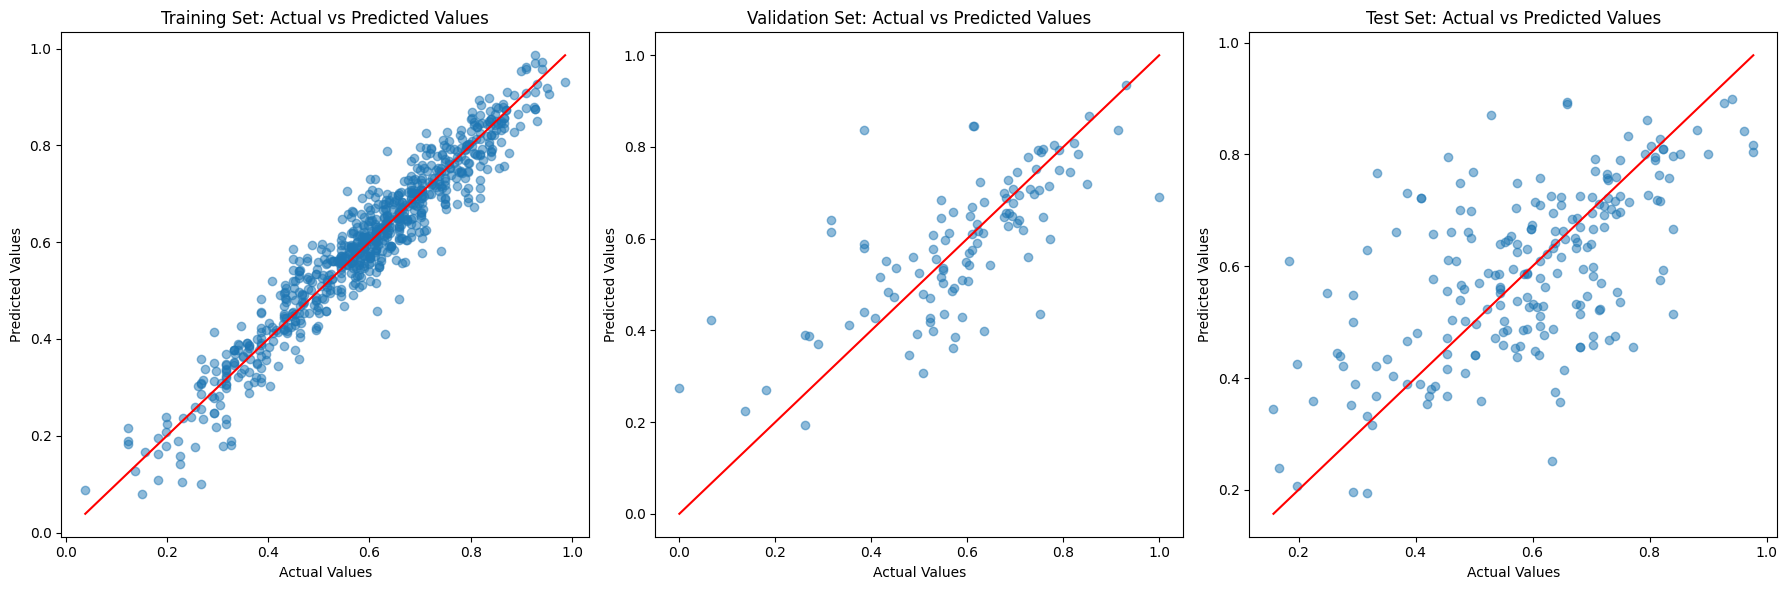

Round: 2
GCN Train Scores: {'pearson_r2_score': 0.9414531655018915}
GCN Validation Scores: {'pearson_r2_score': 0.4635983550941974}
GCN Test Scores: {'pearson_r2_score': 0.5047674751348926}


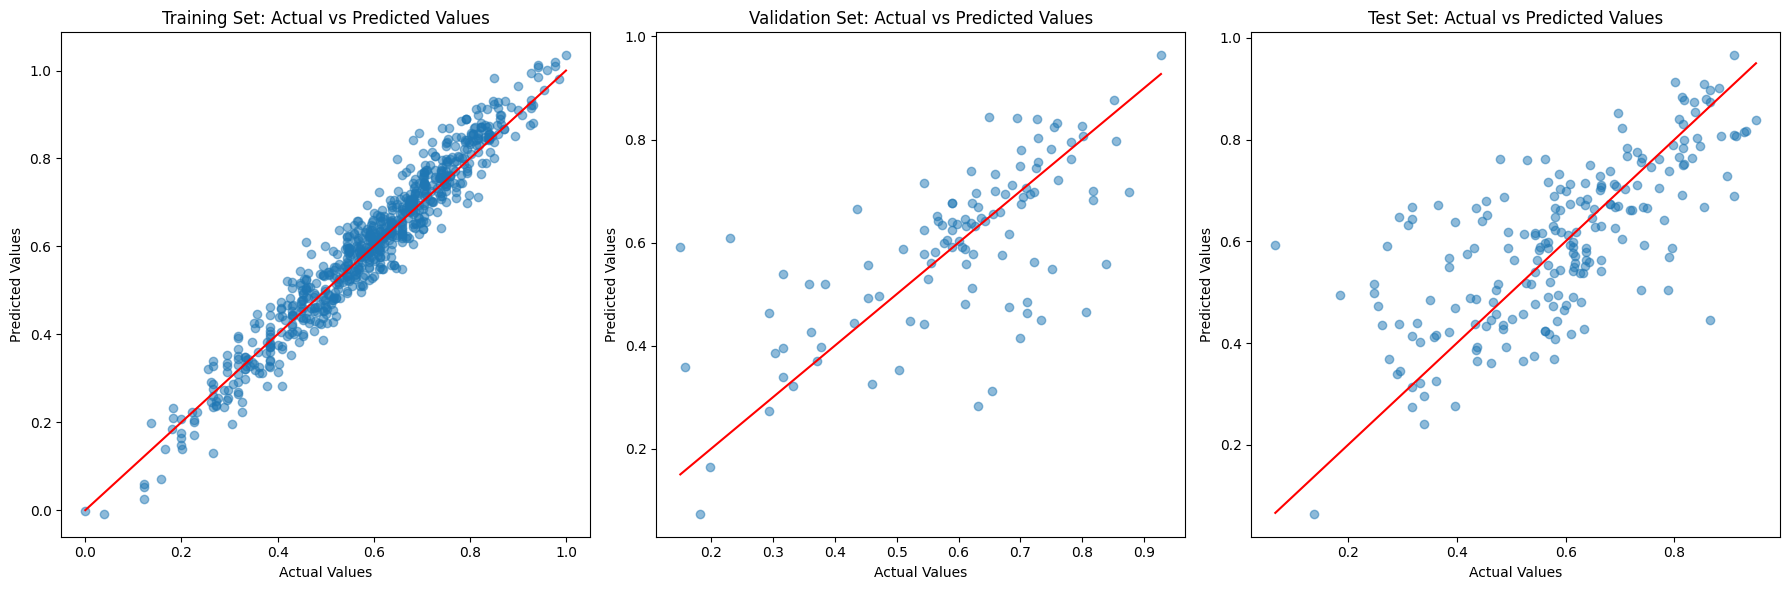

Round: 3
GCN Train Scores: {'pearson_r2_score': 0.9522333469058978}
GCN Validation Scores: {'pearson_r2_score': 0.5964584460932439}
GCN Test Scores: {'pearson_r2_score': 0.4638713242757417}


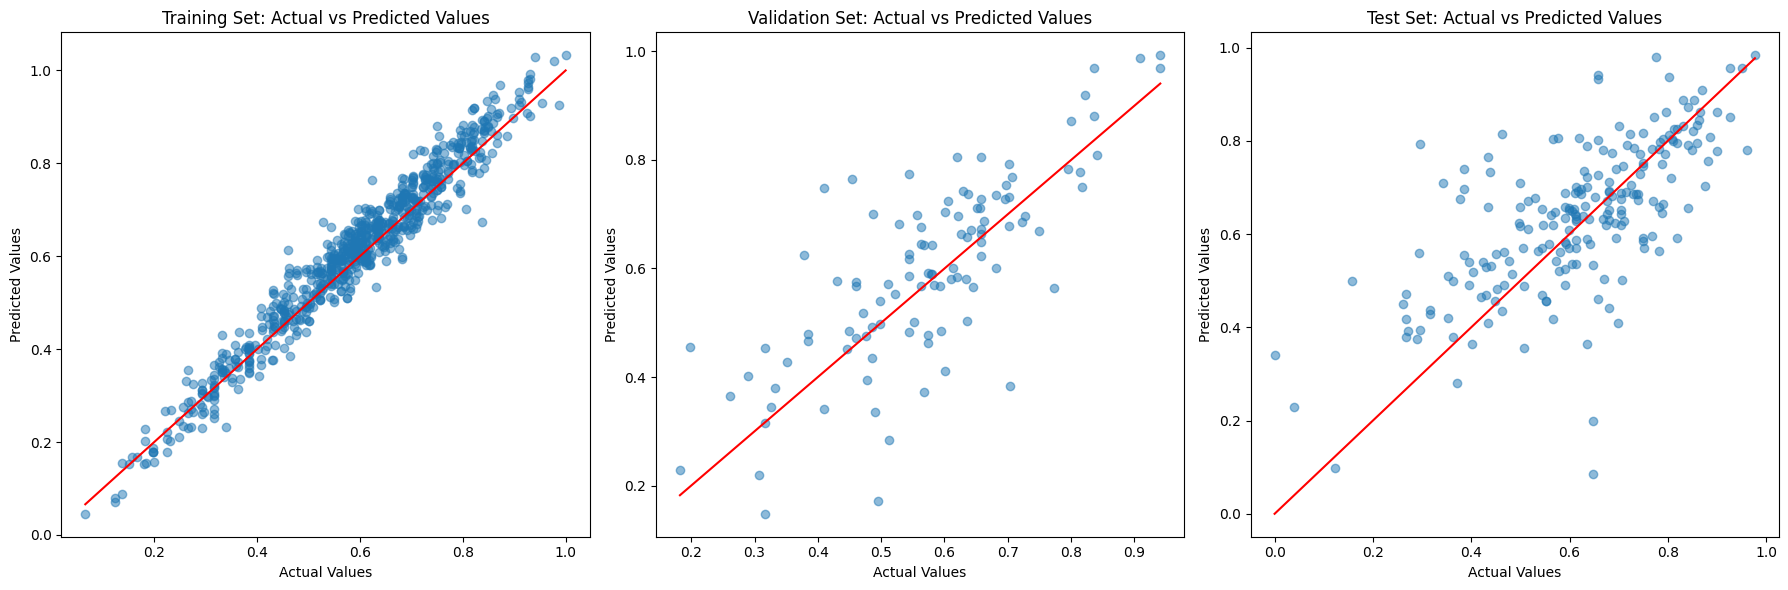

Round: 4
GCN Train Scores: {'pearson_r2_score': 0.9232819053898873}
GCN Validation Scores: {'pearson_r2_score': 0.42306730242943913}
GCN Test Scores: {'pearson_r2_score': 0.5002495514809645}


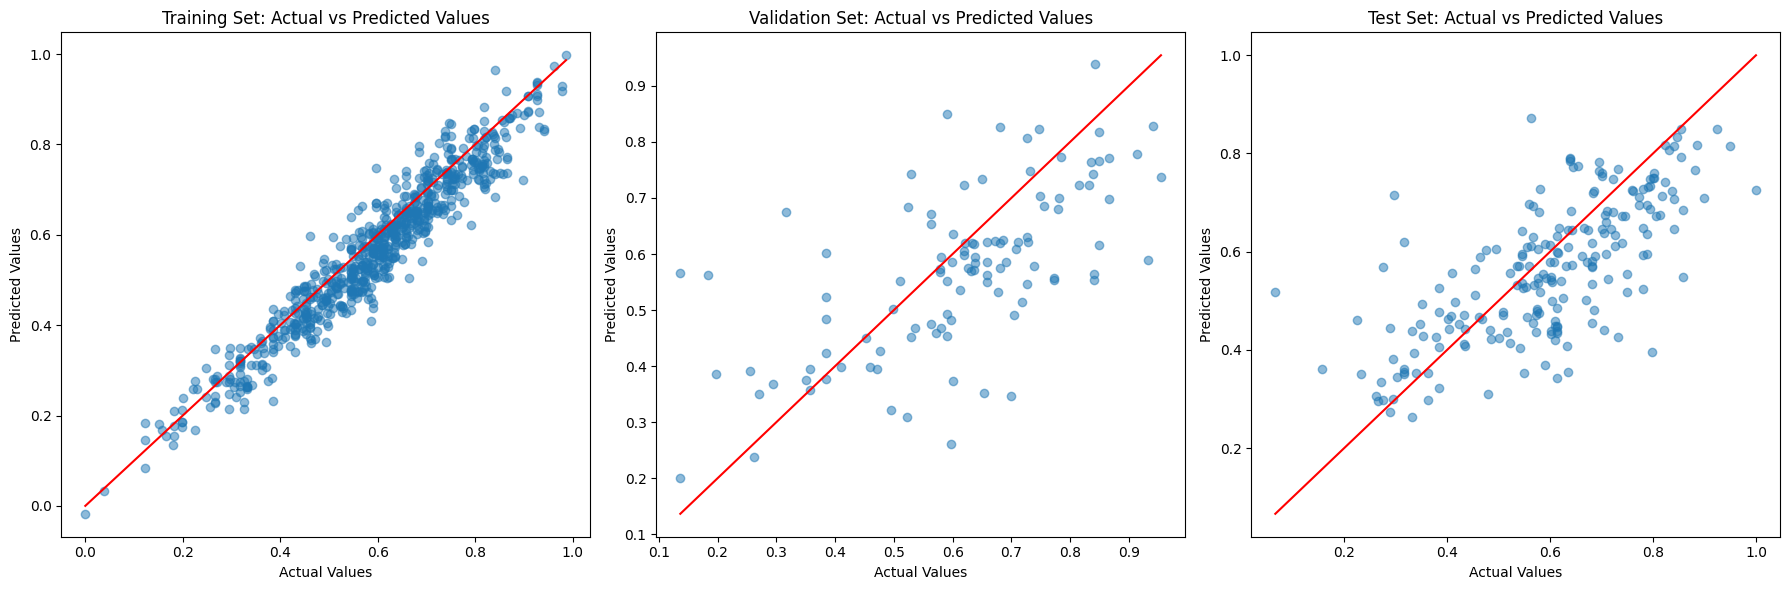

Round: 5
GCN Train Scores: {'pearson_r2_score': 0.948363904765206}
GCN Validation Scores: {'pearson_r2_score': 0.48397648756587436}
GCN Test Scores: {'pearson_r2_score': 0.5683182335485827}


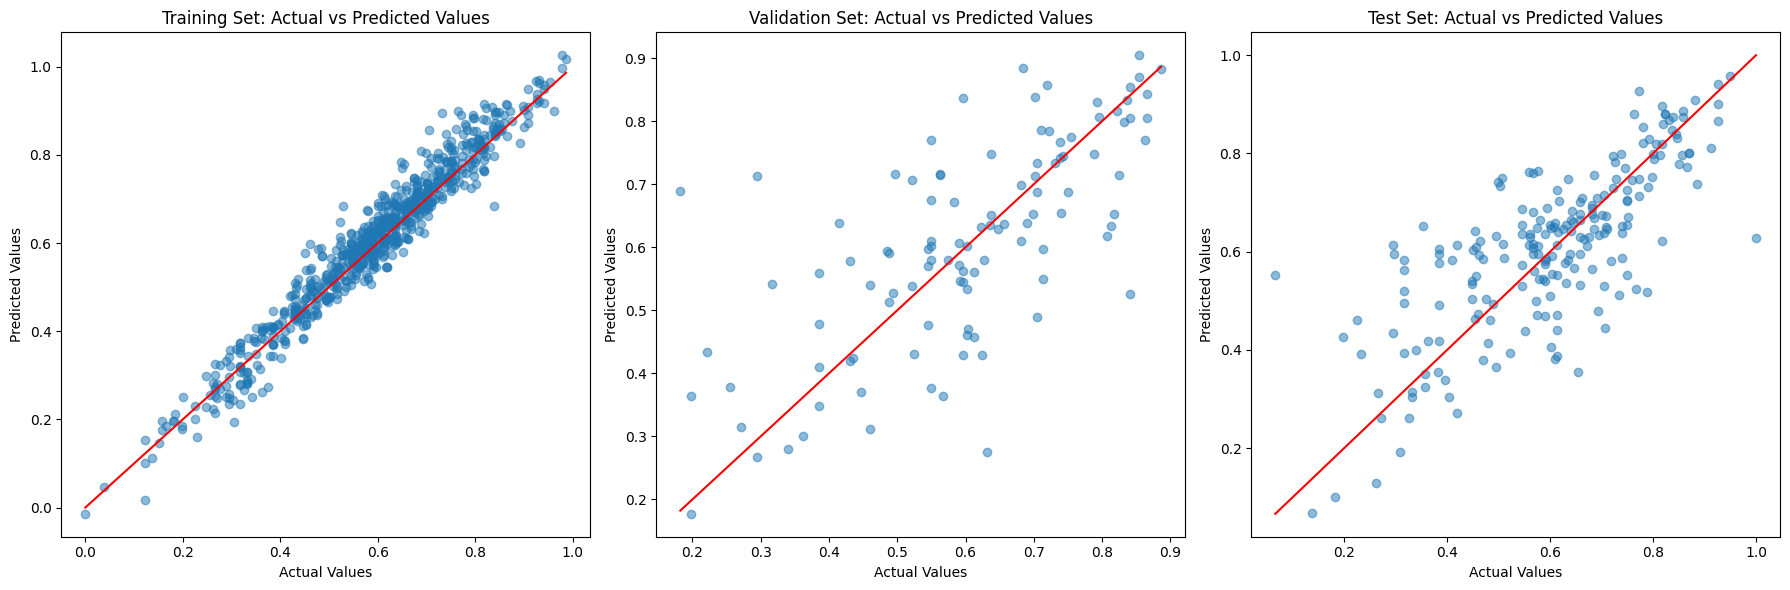

Round: 6
GCN Train Scores: {'pearson_r2_score': 0.9257085733951936}
GCN Validation Scores: {'pearson_r2_score': 0.45935928626049455}
GCN Test Scores: {'pearson_r2_score': 0.3513358765189636}


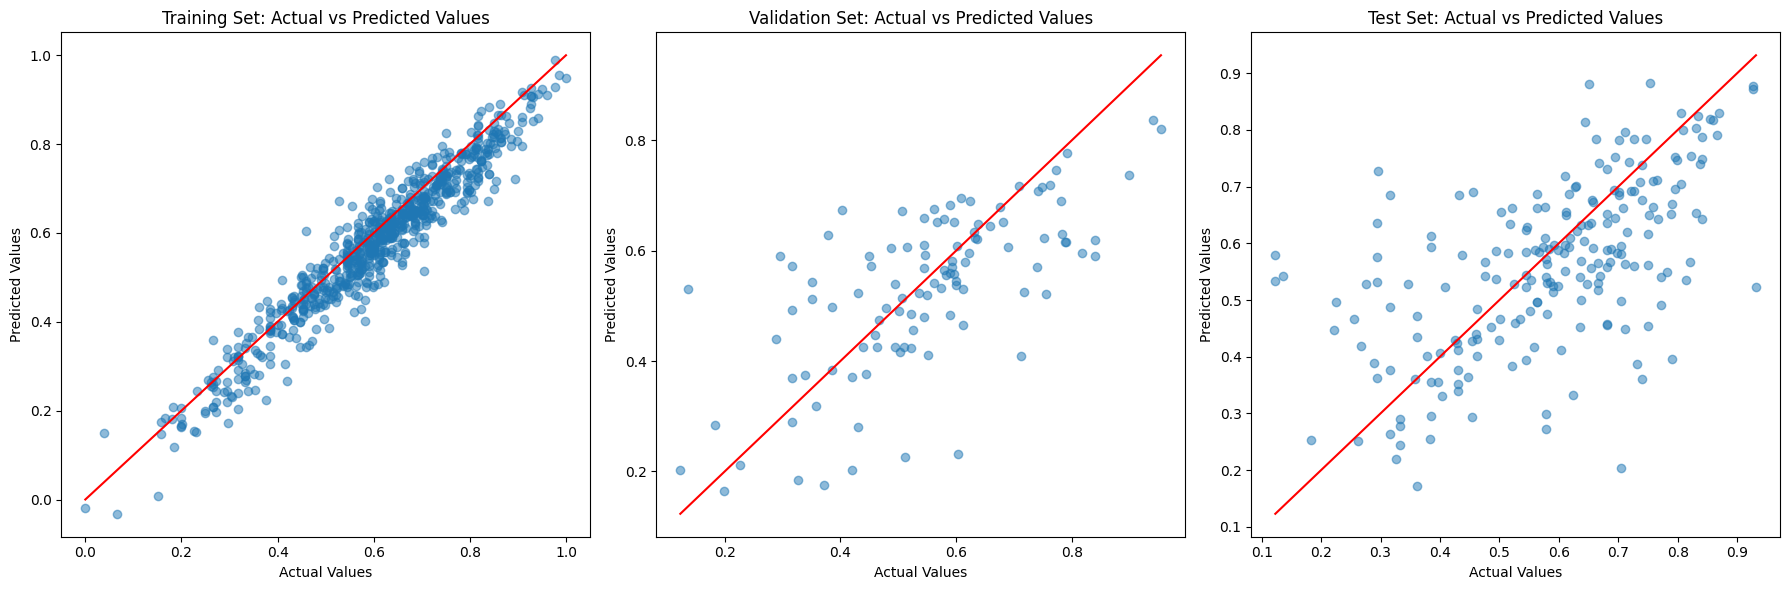

Round: 7
GCN Train Scores: {'pearson_r2_score': 0.8838749504118009}
GCN Validation Scores: {'pearson_r2_score': 0.3495959331039132}
GCN Test Scores: {'pearson_r2_score': 0.3841782828494159}


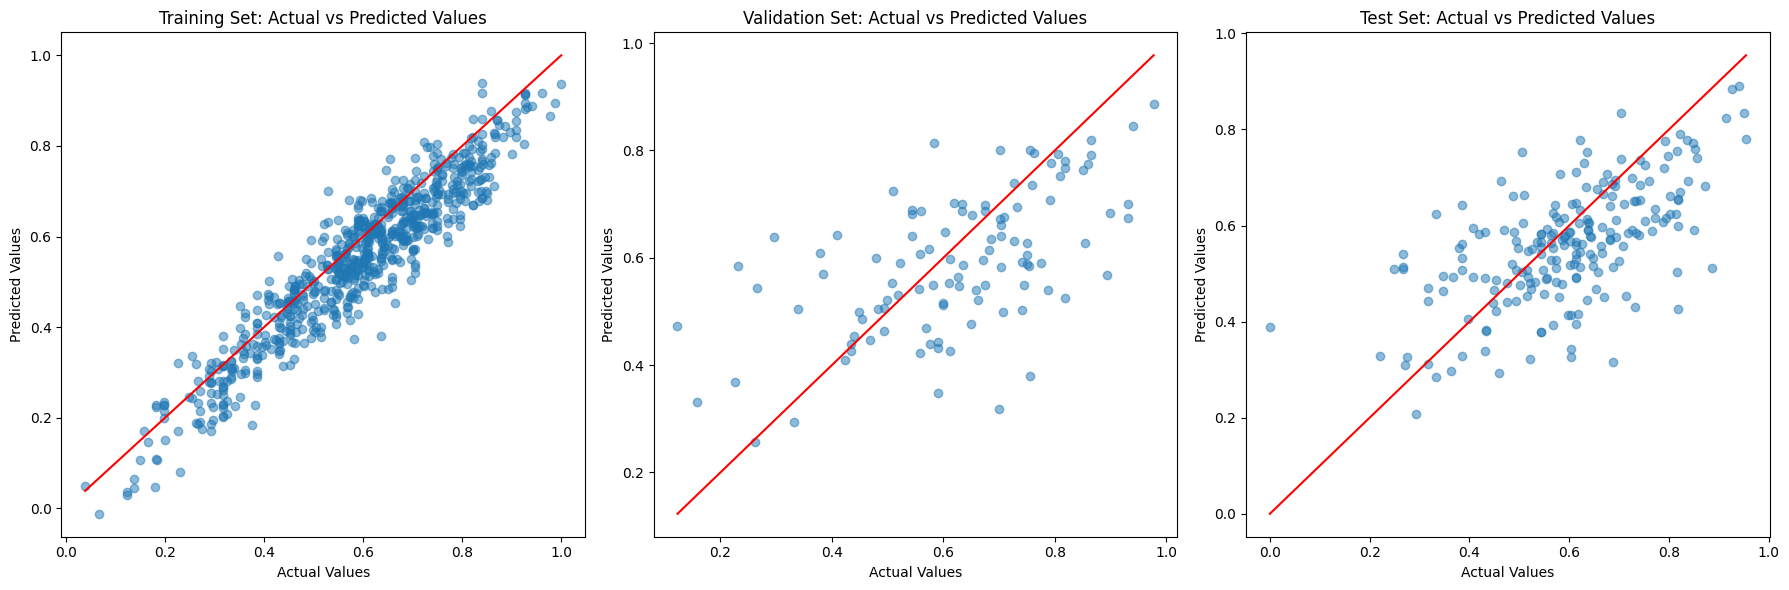

Round: 8
GCN Train Scores: {'pearson_r2_score': 0.926840955778655}
GCN Validation Scores: {'pearson_r2_score': 0.539451289717772}
GCN Test Scores: {'pearson_r2_score': 0.5417960764571721}


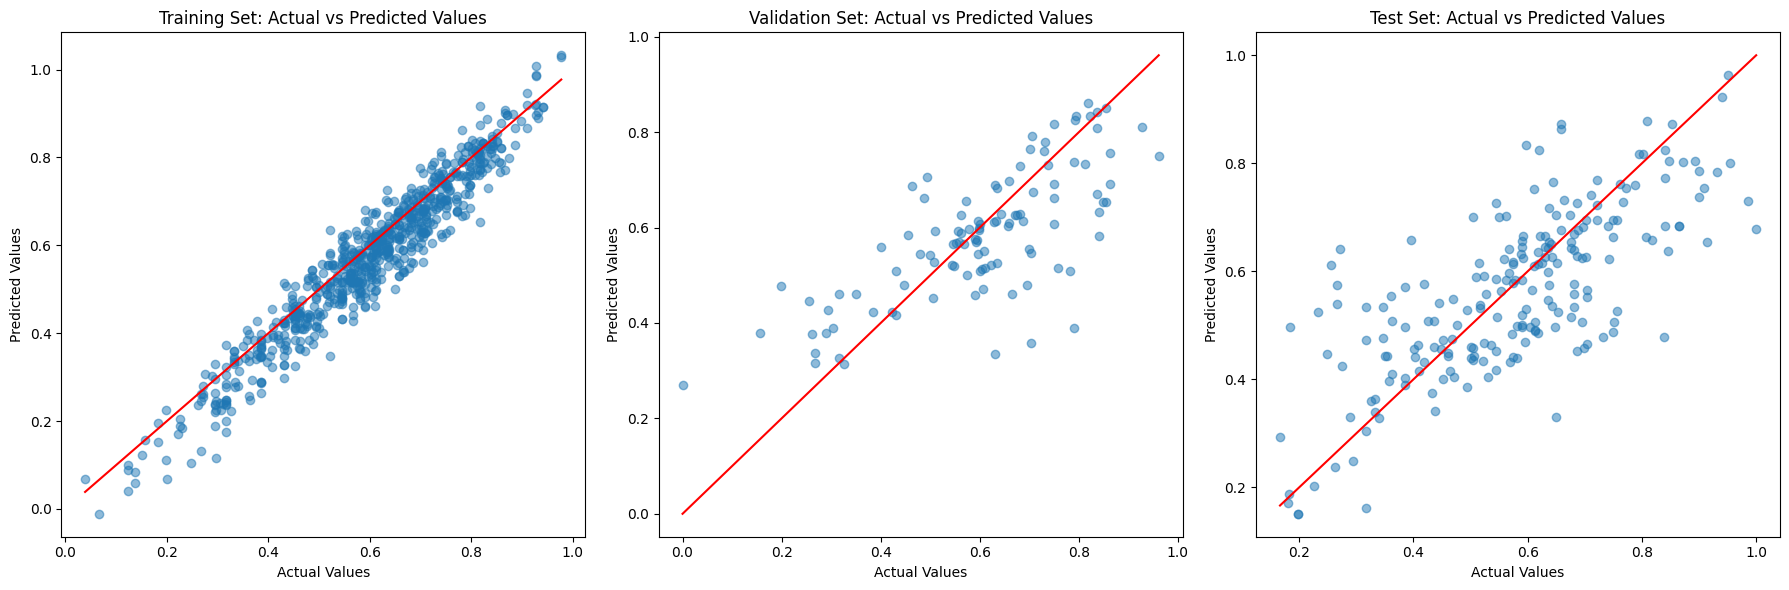

Round: 9
GCN Train Scores: {'pearson_r2_score': 0.9308949032034585}
GCN Validation Scores: {'pearson_r2_score': 0.31588777679977453}
GCN Test Scores: {'pearson_r2_score': 0.5475364089632686}


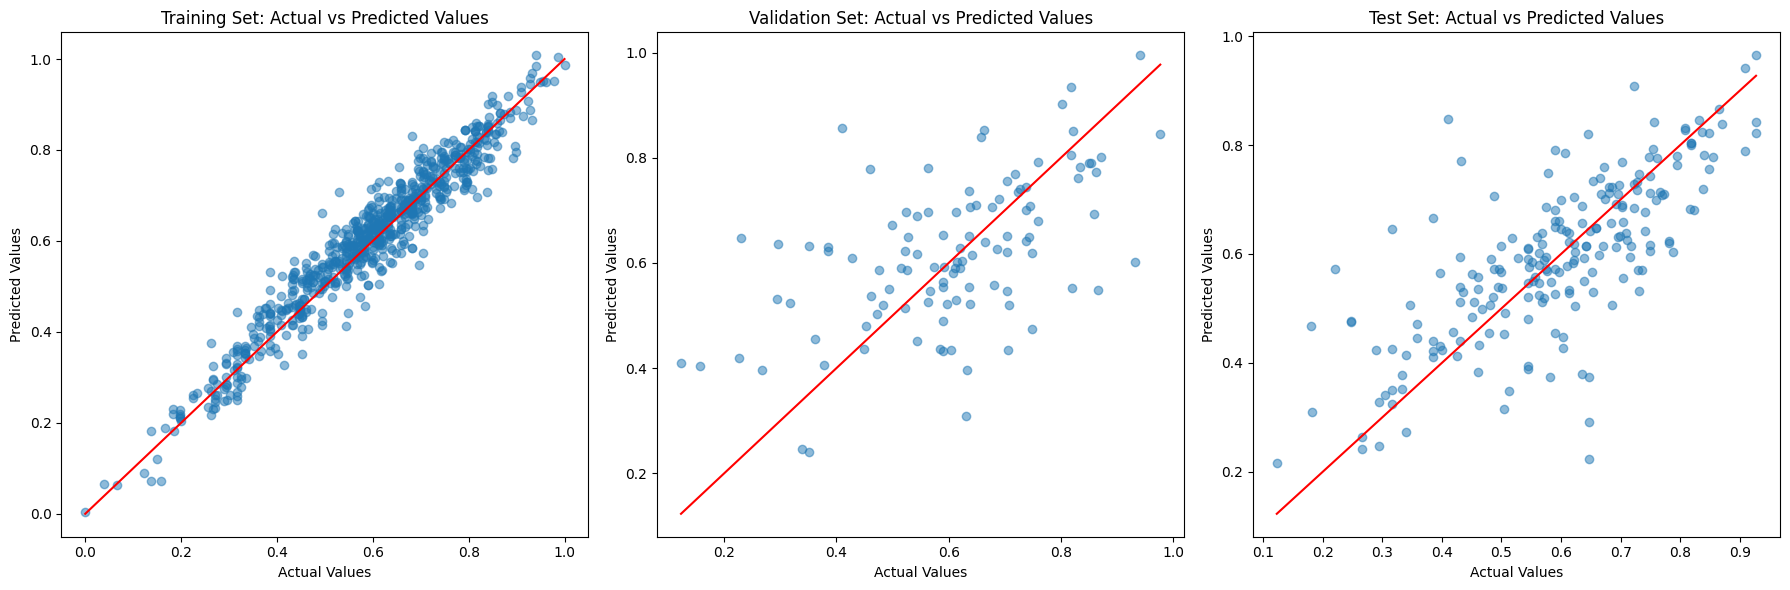

Round: 10
GCN Train Scores: {'pearson_r2_score': 0.949193244520658}
GCN Validation Scores: {'pearson_r2_score': 0.6087162586440156}
GCN Test Scores: {'pearson_r2_score': 0.5227728346114784}


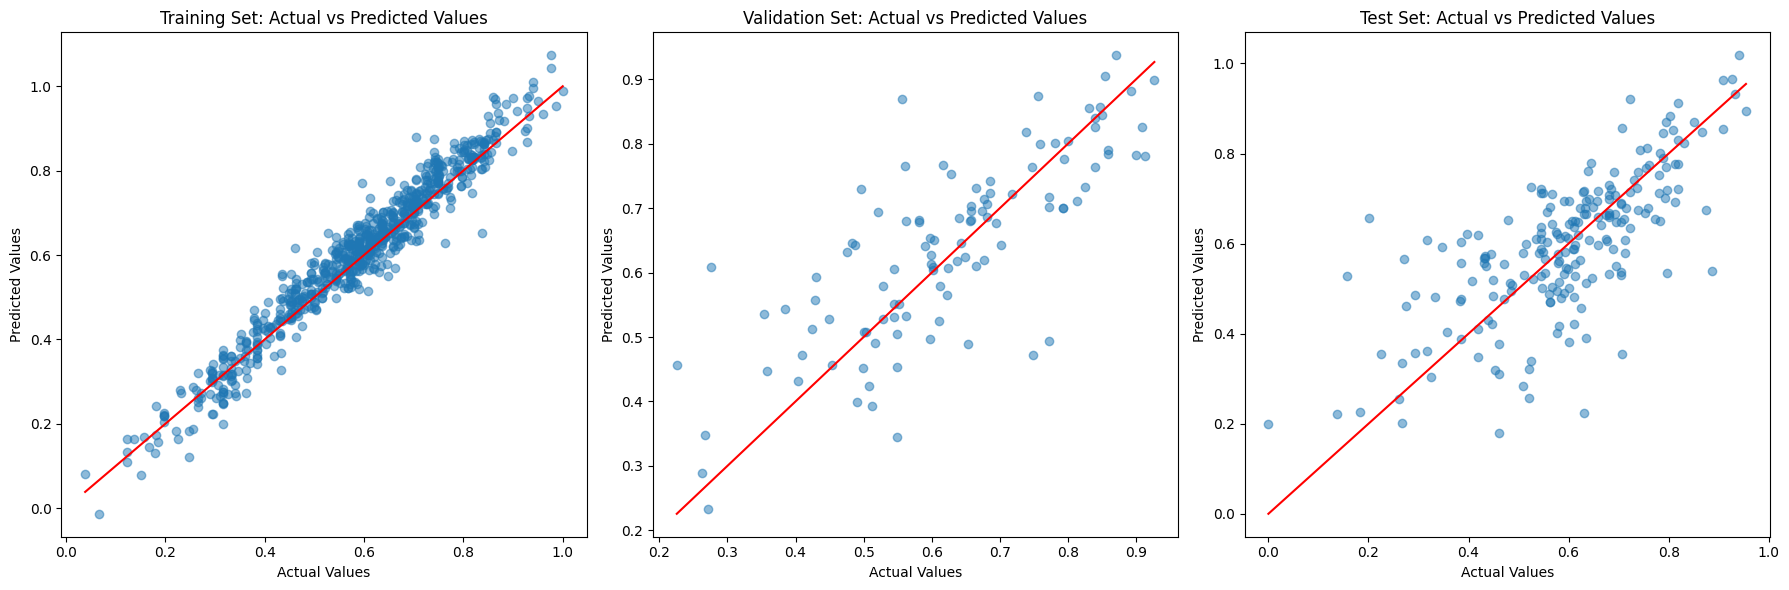

In [18]:
for i in range(10):
  print("Round:", i+1)
  shuffled_df = shuffle(df, random_state=None)

  # Split the dataset
  train_df = shuffled_df.iloc[:train_size]
  test_df = shuffled_df.iloc[train_size:train_size + test_size]
  valid_df = shuffled_df.iloc[train_size + test_size:train_size + test_size + valid_size]

  model = GraphConvModel(
    n_tasks=1,
    graph_conv_layers=[64,32],
    batch_size=batch_size,
    mode='regression',
    batch_normalize=False,
    dropout=0.2,
    dense_layer_size=64,
    learning_rate=0.001,
    number_atom_features=50,
    callbacks=[early_stopping],
    validation_data=valid_df,
  )

  train_smiles, train_targets = load_data(train_df)
  valid_smiles, valid_targets = load_data(valid_df)
  test_smiles, test_targets = load_data(test_df)

  # Initialize featurizer
  featurizer = ConvMolFeaturizer()

  # Convert data to DeepChem format
  train_feats = featurizer.featurize(train_smiles)
  valid_feats = featurizer.featurize(valid_smiles)
  test_feats = featurizer.featurize(test_smiles)

  train_dataset = NumpyDataset(train_feats, train_targets)
  valid_dataset = NumpyDataset(valid_feats, valid_targets)
  test_dataset = NumpyDataset(test_feats, test_targets)

  model.fit(train_dataset, nb_epoch=1000)
  gcn_train_scores = model.evaluate(train_dataset, metrics=[dc.metrics.Metric(pearson_r2_score)])
  gcn_val_scores = model.evaluate(valid_dataset, metrics=[dc.metrics.Metric(pearson_r2_score)])
  gcn_test_scores = model.evaluate(test_dataset, metrics=[dc.metrics.Metric(pearson_r2_score)])

  print("GCN Train Scores:", gcn_train_scores)
  print("GCN Validation Scores:", gcn_val_scores)
  print("GCN Test Scores:", gcn_test_scores)


  # Get predictions
  train_preds = model.predict(train_dataset)
  val_preds = model.predict(valid_dataset)
  test_preds = model.predict(test_dataset)


  train_preds = train_preds
  val_preds =val_preds
  test_preds = test_preds
  train_y = train_dataset.y
  val_y = valid_dataset.y
  test_y = test_dataset.y

  # Plotting training predictions vs actual values
  plt.figure(figsize=(18, 6))

  plt.subplot(1, 3, 1)
  plt.scatter(train_y, train_preds, alpha=0.5)
  plt.xlabel('Actual Values')
  plt.ylabel('Predicted Values')
  plt.title('Training Set: Actual vs Predicted Values')
  plt.plot([min(train_y), max(train_y)], [min(train_y), max(train_y)], color='red')

  # Plotting validation predictions vs actual values
  plt.subplot(1, 3, 2)
  plt.scatter(val_y, val_preds, alpha=0.5)
  plt.xlabel('Actual Values')
  plt.ylabel('Predicted Values')
  plt.title('Validation Set: Actual vs Predicted Values')
  plt.plot([min(val_y), max(val_y)], [min(val_y), max(val_y)], color='red')

  # Plotting test predictions vs actual values
  plt.subplot(1, 3, 3)
  plt.scatter(test_y, test_preds, alpha=0.5)
  plt.xlabel('Actual Values')
  plt.ylabel('Predicted Values')
  plt.title('Test Set: Actual vs Predicted Values')
  plt.plot([min(test_y), max(test_y)], [min(test_y), max(test_y)], color='red')

  plt.tight_layout()
  plt.show()




In [ ]:
# Evaluate GCN model
gcn_train_scores = model.evaluate(train_dataset, metrics=[dc.metrics.Metric(pearson_r2_score)])
gcn_val_scores = model.evaluate(valid_dataset, metrics=[dc.metrics.Metric(pearson_r2_score)])
gcn_test_scores = model.evaluate(test_dataset, metrics=[dc.metrics.Metric(pearson_r2_score)])

print("GCN Train Scores:", gcn_train_scores)
print("GCN Validation Scores:", gcn_val_scores)
print("GCN Test Scores:", gcn_test_scores)

GCN Train Scores: {'pearson_r2_score': 0.987222760716315}
GCN Validation Scores: {'pearson_r2_score': 0.48210439059812477}
GCN Test Scores: {'pearson_r2_score': 0.5210133802392359}


In [ ]:
# Evaluate GCN model
gcn_train_scores = model.evaluate(train_dataset, metrics=[dc.metrics.Metric(pearson_r2_score)])
gcn_val_scores = model.evaluate(valid_dataset, metrics=[dc.metrics.Metric(pearson_r2_score)])
gcn_test_scores = model.evaluate(test_dataset, metrics=[dc.metrics.Metric(pearson_r2_score)])

print("GCN Train Scores:", gcn_train_scores)
print("GCN Validation Scores:", gcn_val_scores)
print("GCN Test Scores:", gcn_test_scores)

GCN Train Scores: {'pearson_r2_score': 0.9228358807064128}
GCN Validation Scores: {'pearson_r2_score': 0.5778878587839835}
GCN Test Scores: {'pearson_r2_score': 0.5120380617416437}


In [ ]:
from deepchem.models import GraphConvModel

def print_graphconv_model_architecture(model):
    """Print the architecture of the GraphConvModel."""

    # Print the type of model
    print(f"Model Type: {type(model)}")

    # Access and print the model's internal components
    if hasattr(model, 'model'):
        print("Model's internal Keras model:")
        print(model.model.summary())
    else:
        print("Model's internal Keras model is not available")



# Print the architecture
print_graphconv_model_architecture(model)


Model Type: <class '__main__.CustomGraphConvModel'>
Model's internal Keras model:
Model: "private__graph_conv_keras_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 graph_conv (GraphConv)      multiple                  102144    
                                                                 
 graph_conv_1 (GraphConv)    multiple                  43680     
                                                                 
 dropout (Dropout)           multiple                  0         
                                                                 
 dropout_1 (Dropout)         multiple                  0         
                                                                 
 dropout_2 (Dropout)         multiple                  0         
                                                                 
 graph_pool (GraphPool)      multiple                  0         
                   

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np

# Get predictions
train_preds = model.predict(train_dataset)
val_preds = model.predict(valid_dataset)
test_preds = model.predict(test_dataset)

# Reverse the transformation for predictions and actual values
transformer = dc.trans.NormalizationTransformer(transform_y=True, dataset=train_dataset)
train_preds = transformer.untransform(train_preds)
val_preds = transformer.untransform(val_preds)
test_preds = transformer.untransform(test_preds)
train_y = transformer.untransform(train_dataset.y)
val_y = transformer.untransform(valid_dataset.y)
test_y = transformer.untransform(test_dataset.y)

# Calculate MSE and RMSE
def calculate_metrics(true_values, predictions):
    mse = mean_squared_error(true_values, predictions)
    rmse = np.sqrt(mse)
    return mse, rmse

train_mse, train_rmse = calculate_metrics(train_y, train_preds)
val_mse, val_rmse = calculate_metrics(val_y, val_preds)
test_mse, test_rmse = calculate_metrics(test_y, test_preds)

print(f"Training Set - MSE: {train_mse:.4f}, RMSE: {train_rmse:.4f}")
print(f"Validation Set - MSE: {val_mse:.4f}, RMSE: {val_rmse:.4f}")
print(f"Test Set - MSE: {test_mse:.4f}, RMSE: {test_rmse:.4f}")

Training Set - MSE: 0.0535, RMSE: 0.2312
Validation Set - MSE: 0.1797, RMSE: 0.4240
Test Set - MSE: 0.1433, RMSE: 0.3786


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np

# Get predictions
train_preds = best_model.predict(train_dataset)
val_preds = best_model.predict(valid_dataset)
test_preds = best_model.predict(test_dataset)

# Reverse the transformation for predictions and actual values
transformer = dc.trans.NormalizationTransformer(transform_y=True, dataset=train_dataset)
train_preds = transformer.untransform(train_preds)
val_preds = transformer.untransform(val_preds)
test_preds = transformer.untransform(test_preds)
train_y = transformer.untransform(train_dataset.y)
val_y = transformer.untransform(valid_dataset.y)
test_y = transformer.untransform(test_dataset.y)

# Calculate MSE and RMSE
def calculate_metrics(true_values, predictions):
    mse = mean_squared_error(true_values, predictions)
    rmse = np.sqrt(mse)
    return mse, rmse

train_mse, train_rmse = calculate_metrics(train_y, train_preds)
val_mse, val_rmse = calculate_metrics(val_y, val_preds)
test_mse, test_rmse = calculate_metrics(test_y, test_preds)

print(f"Training Set - MSE: {train_mse:.4f}, RMSE: {train_rmse:.4f}")
print(f"Validation Set - MSE: {val_mse:.4f}, RMSE: {val_rmse:.4f}")
print(f"Test Set - MSE: {test_mse:.4f}, RMSE: {test_rmse:.4f}")

Training Set - MSE: 0.1741, RMSE: 0.4172
Validation Set - MSE: 0.2240, RMSE: 0.4732
Test Set - MSE: 0.1980, RMSE: 0.4449


In [ ]:
train_errors = [mean_squared_error(train_y, model.predict(train_dataset)) for _ in range(10)]
val_errors = [mean_squared_error(val_y, model.predict(valid_dataset)) for _ in range(10)]
test_errors = [mean_squared_error(test_y, model.predict(test_dataset)) for _ in range(10)]

train_mse_ci = calculate_confidence_interval(train_errors)
val_mse_ci = calculate_confidence_interval(val_errors)
test_mse_ci = calculate_confidence_interval(test_errors)

print(f"Training Set - MSE: {train_mse:.4f}, RMSE: {train_rmse:.4f}, 95% CI: {train_mse_ci}")
print(f"Validation Set - MSE: {val_mse:.4f}, RMSE: {val_rmse:.4f}, 95% CI: {val_mse_ci}")
print(f"Test Set - MSE: {test_mse:.4f}, RMSE: {test_rmse:.4f}, 95% CI: {test_mse_ci}")

Training Set - MSE: 0.1741, RMSE: 0.4172, 95% CI: (0.14322878494476615, 0.14322878494476615)
Validation Set - MSE: 0.2240, RMSE: 0.4732, 95% CI: (0.23151035065560735, 0.2315103506556074)
Test Set - MSE: 0.1980, RMSE: 0.4449, 95% CI: (0.2408228732308282, 0.24082287323082827)


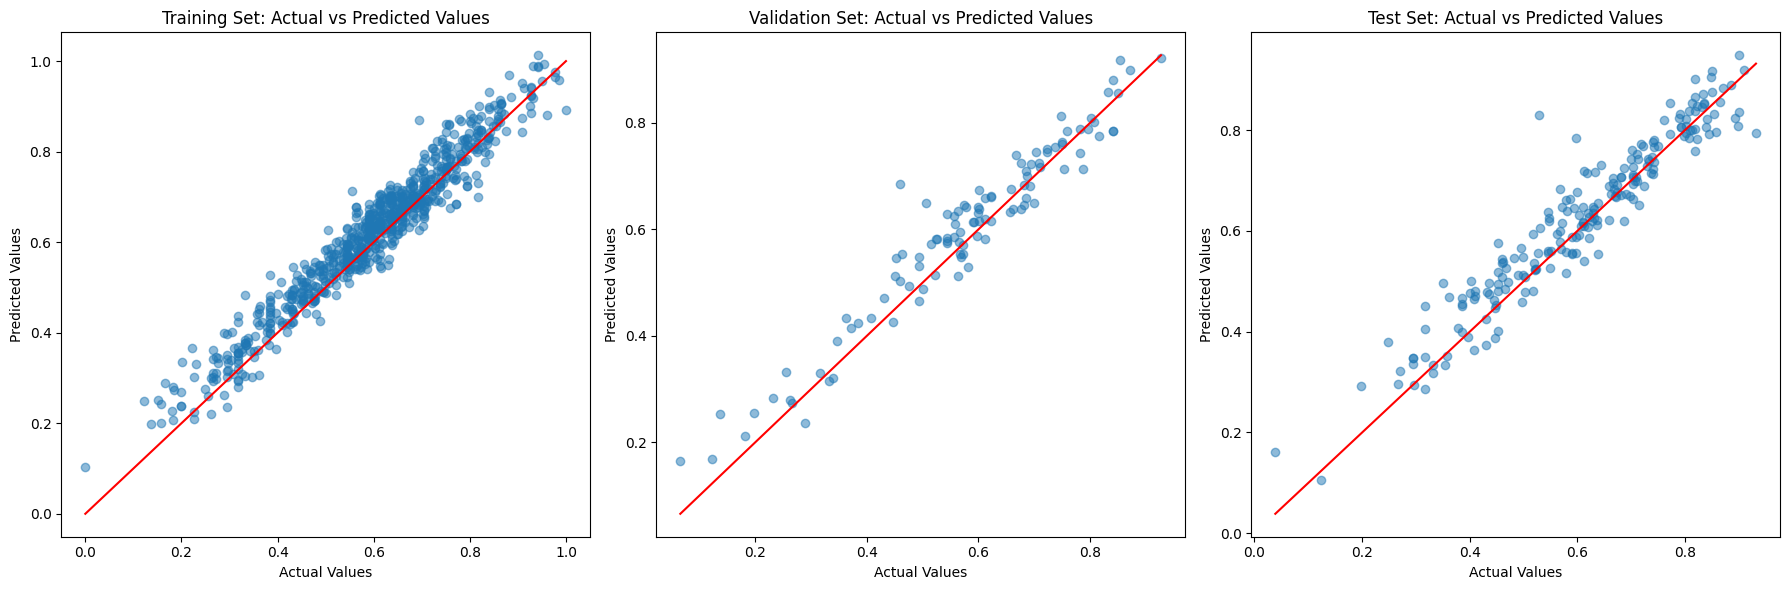

In [ ]:
import matplotlib.pyplot as plt

# Get predictions
train_preds = model.predict(train_dataset)
val_preds = model.predict(valid_dataset)
test_preds = model.predict(test_dataset)


train_preds = train_preds
val_preds =val_preds
test_preds = test_preds
train_y = train_dataset.y
val_y = valid_dataset.y
test_y = test_dataset.y

# Plotting training predictions vs actual values
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.scatter(train_y, train_preds, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Training Set: Actual vs Predicted Values')
plt.plot([min(train_y), max(train_y)], [min(train_y), max(train_y)], color='red')

# Plotting validation predictions vs actual values
plt.subplot(1, 3, 2)
plt.scatter(val_y, val_preds, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Validation Set: Actual vs Predicted Values')
plt.plot([min(val_y), max(val_y)], [min(val_y), max(val_y)], color='red')

# Plotting test predictions vs actual values
plt.subplot(1, 3, 3)
plt.scatter(test_y, test_preds, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Test Set: Actual vs Predicted Values')
plt.plot([min(test_y), max(test_y)], [min(test_y), max(test_y)], color='red')

plt.tight_layout()
plt.show()


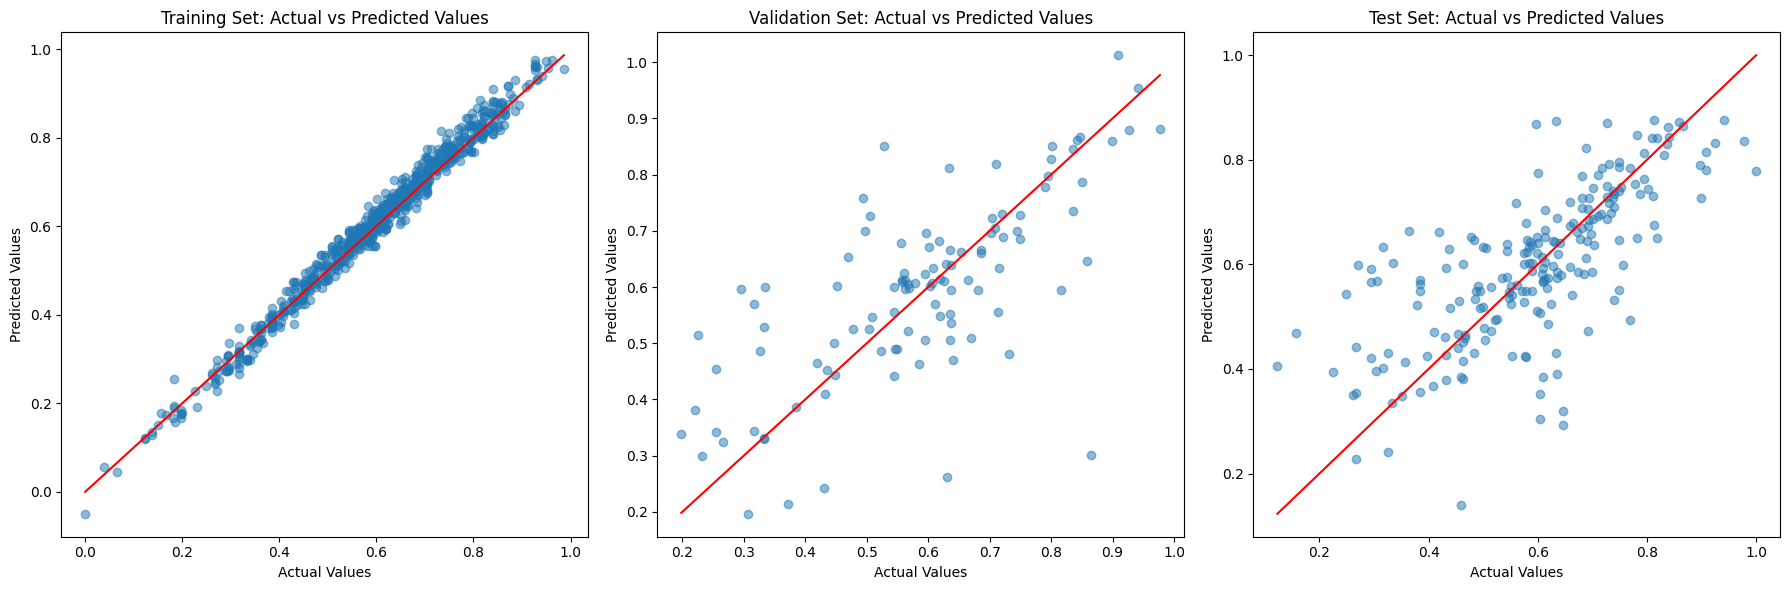

In [ ]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

# Get predictions
train_preds = model.predict(train_dataset)
val_preds = model.predict(valid_dataset)
test_preds = model.predict(test_dataset)


train_preds = train_preds
val_preds =val_preds
test_preds = test_preds
train_y = train_dataset.y
val_y = valid_dataset.y
test_y = test_dataset.y

# Plotting training predictions vs actual values
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.scatter(train_y, train_preds, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Training Set: Actual vs Predicted Values')
plt.plot([min(train_y), max(train_y)], [min(train_y), max(train_y)], color='red')

# Plotting validation predictions vs actual values
plt.subplot(1, 3, 2)
plt.scatter(val_y, val_preds, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Validation Set: Actual vs Predicted Values')
plt.plot([min(val_y), max(val_y)], [min(val_y), max(val_y)], color='red')

# Plotting test predictions vs actual values
plt.subplot(1, 3, 3)
plt.scatter(test_y, test_preds, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Test Set: Actual vs Predicted Values')
plt.plot([min(test_y), max(test_y)], [min(test_y), max(test_y)], color='red')

plt.tight_layout()
plt.show()

In [ ]:
!sudo apt install python2

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libpython2-stdlib libpython2.7-minimal libpython2.7-stdlib python2-minimal
  python2.7 python2.7-minimal
Suggested packages:
  python2-doc python-tk python2.7-doc binfmt-support
The following NEW packages will be installed:
  libpython2-stdlib libpython2.7-minimal libpython2.7-stdlib python2
  python2-minimal python2.7 python2.7-minimal
0 upgraded, 7 newly installed, 0 to remove and 45 not upgraded.
Need to get 4,007 kB of archives.
After this operation, 16.2 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 libpython2.7-minimal amd64 2.7.18-13ubuntu1.2 [347 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 python2.7-minimal amd64 2.7.18-13ubuntu1.2 [1,397 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 python2-minimal amd64 2.7.18-3 [20.8 

In [ ]:
!apt-get update -y
!apt-get install python2.7
!update-alternatives --install /usr/bin/python python /usr/bin/python2.7 1
!update-alternatives --install /usr/bin/python python /usr/bin/python3 2




Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Ign:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:6 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [920 kB]
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Hit:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:11 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:13 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,218 kB]
Get:14 htt

In [ ]:
!python --version


Python 3.10.12


In [ ]:
%%python2
print "This is Python 2.x"


This is Python 2.x


In [ ]:
!git clone https://github.com/HIPS/neural-fingerprint.git


Cloning into 'neural-fingerprint'...
remote: Enumerating objects: 1760, done.
remote: Total 1760 (delta 0), reused 0 (delta 0), pack-reused 1760
Receiving objects: 100% (1760/1760), 51.21 MiB | 15.44 MiB/s, done.
Resolving deltas: 100% (1141/1141), done.


In [ ]:
%cd neural-fingerprint

/content/neural-fingerprint


In [ ]:
!pip install .


Processing /content/neural-fingerprint
  Preparing metadata (setup.py) ... done
  Created wheel for neuralfingerprint: filename=neuralfingerprint-1.0.0-py3-none-any.whl size=13822 sha256=8597142d9291a70b59c230bf23cb0508e1d30b8768f48f04806e7fb49d3ca32a
  Stored in directory: /root/.cache/pip/wheels/cf/58/b7/4f43649b7e265b67120f1d2da62f22313daa8a7b1fc6ace73e
Successfully built neuralfingerprint
  Attempting uninstall: neuralfingerprint
    Found existing installation: neuralfingerprint 1.0.0
    Uninstalling neuralfingerprint-1.0.0:
      Successfully uninstalled neuralfingerprint-1.0.0


In [ ]:
# Clone the repository
!git clone https://github.com/HIPS/neural-fingerprint.git

# Change directory to the cloned repository
%cd neural-fingerprint

# Add the package directory to the system path
import sys
sys.path.append('/content/neural-fingerprint')

# Install the package
!pip install .

# Verify installation
try:
    import neuralfingerprint
    print("neuralfingerprint is installed successfully.")
except ImportError:
    print("neuralfingerprint installation failed.")


Cloning into 'neural-fingerprint'...
remote: Enumerating objects: 1760, done.
remote: Total 1760 (delta 0), reused 0 (delta 0), pack-reused 1760
Receiving objects: 100% (1760/1760), 51.21 MiB | 24.58 MiB/s, done.
Resolving deltas: 100% (1141/1141), done.
/content/neural-fingerprint/neural-fingerprint
Processing /content/neural-fingerprint/neural-fingerprint
  Preparing metadata (setup.py) ... done
  Created wheel for neuralfingerprint: filename=neuralfingerprint-1.0.0-py3-none-any.whl size=13822 sha256=0a5ffb0590d97da6644a6be15b3f5950e9eb79e1f490d08b1b8152f266be5e85
  Stored in directory: /root/.cache/pip/wheels/08/10/57/244ec20030672ce09a3ceec1b61991e59c611386837ed2d8b8
Successfully built neuralfingerprint
  Attempting uninstall: neuralfingerprint
    Found existing installation: neuralfingerprint 1.0.0
    Uninstalling neuralfingerprint-1.0.0:
      Successfully uninstalled neuralfingerprint-1.0.0
neuralfingerprint installation failed.


In [ ]:
import os

package_dir = '/content/neural-fingerprint/neuralfingerprint'
os.listdir(package_dir)


['__pycache__',
 'util.py',
 'mol_graph.py',
 'data_util.py',
 'build_vanilla_net.py',
 'optimizers.py',
 '__init__.py',
 'build_double_net.py',
 'features.py',
 'rdkit_utils.py',
 'io_utils.py',
 'build_convnet.py']

In [ ]:
!pip install autograd

In [ ]:
!pip2 install autograd


/bin/bash: line 1: pip2: command not found


In [ ]:
%%python2
!pip2 install autograd

import sys
sys.path.append('/content/neural-fingerprint/neuralfingerprint')

try:
    import neuralfingerprint
    from neuralfingerprint.util import normalize_array
    print("neuralfingerprint package and util module imported successfully.")
except ImportError as e:
    print("ImportError:", e)


  File "<stdin>", line 1
    !pip2 install autograd
    ^
SyntaxError: invalid syntax


CalledProcessError: Command 'b'!pip2 install autograd\n\nimport sys\nsys.path.append(\'/content/neural-fingerprint/neuralfingerprint\')\n\ntry:\n    import neuralfingerprint\n    from neuralfingerprint.util import normalize_array\n    print("neuralfingerprint package and util module imported successfully.")\nexcept ImportError as e:\n    print("ImportError:", e)\n'' returned non-zero exit status 1.

In [ ]:
from neuralfingerprint.util import tictoc, normalize_array, WeightsParser, build_batched_grad, add_dropout
from neuralfingerprint.optimizers import sgd, rms_prop, adam, bfgs
from neuralfingerprint.io_utils import get_output_file, get_data_file, load_data, load_data_slices, output_dir
from neuralfingerprint.rdkit_utils import smiles_to_fps
from neuralfingerprint.build_convnet import build_conv_deep_net, build_convnet_fingerprint_fun


SyntaxError: Missing parentheses in call to 'print'. Did you mean print(...)? (util.py, line 22)

In [9]:
file_path = '/content/drive/MyDrive/BBB dataset/B3DB_regression.csv'
df = pd.read_csv(file_path)
df

,NO.,compound_name,IUPAC_name,SMILES,CID,logBB,Inchi,reference,group,comments
0,1,moxalactam,7-[[2-carboxy-2-(4-hydroxyphenyl)acetyl]amino]...,CN1C(=NN=N1)SCC2=C(N3C(C(C3=O)(NC(=O)C(C4=CC=C...,3889.0|,-2.52,InChI=1S/C20H20N6O9S/c1-25-19(22-23-24-25)36-8...,R25|,A,NaN
1,2,schembl614298,"(2s,3s,4s,5r)-6-[[(4r,4ar,7s,7ar,12bs)-7-hydro...",CN1CC[C@]23[C@@H]4[C@H]1CC5=C2C(=C(C=C5)OC6[C@...,18595497.0|,-2.15,InChI=1S/C23H27NO9/c1-24-7-6-23-10-3-4-12(25)2...,R25|,A,NaN
2,3,morphine-6-glucuronide,"(2s,3s,4s,5r)-6-[[(4r,4ar,7s,7ar,12bs)-9-hydro...",CN1CC[C@]23[C@@H]4[C@H]1CC5=C2C(=C(C=C5)O)O[C@...,9847115.0|,-2.09,InChI=1S/C23H27NO9/c1-24-7-6-23-10-3-5-13(31-2...,R25|,A,NaN
3,4,2-[4-(5-bromo-3-methylpyridin-2-yl)butylamino]...,2-[4-(5-bromo-3-methylpyridin-2-yl)butylamino]...,CC1=NC=C(C=C1)CC2CNC(NC2=O)NCCCCC3=NC=C(C=C3C)Br,74041479.0|,-1.88,InChI=1S/C21H28BrN5O/c1-14-9-18(22)13-25-19(14...,R35|,A,NaN
4,5,NaN,NaN,c1(c2c3n(c4c(C(N(C)C3)=O)c(Cl)ccc4)cn2)noc(C(O...,nan|,-1.82,"InChI=1S/C16H14ClN5O4/c1-16(24,25)15-19-13(20-...",R35|,A,NaN
...,...,...,...,...,...,...,...,...,...,...
1053,1054,2qju,"3-(5,6-dihydrobenzo[b][1]benzazepin-11-yl)prop...",C[NH2+]CCCN1C2=CC=CC=C2CCC3=CC=CC=C31,2995.0|2995.0|2995.0|2995.0|2995.0|2995.0|2995...,1.20,InChI=1S/C18H22N2/c1-19-13-6-14-20-17-9-4-2-7-...,R4|R3|R38|R41|R43|R47|R49|R40|R8|R21|R27|R2|R2...,D,NaN
1054,1055,promazine,"n,n-dimethyl-3-phenothiazin-10-ylpropan-1-amine",CN(C)CCCN1C2=CC=CC=C2SC3=CC=CC=C31,4926.0|4926.0|4926.0|4926.0|4926.0|4926.0|4926...,1.23,InChI=1S/C17H20N2S/c1-18(2)12-7-13-19-14-8-3-5...,R3|R4|R50|R40|R38|R41|R8|R21|R27|R2|R2|R27|R3|...,D,NaN
1055,1056,diphenhydramine,"2-benzhydryloxy-n,n-dimethylethanamine",CN(C)CCOC(C1=CC=CC=C1)C2=CC=CC=C2,3100.0|3100.0|3100.0|3100.0|3100.0|3100.0|3100...,1.30,InChI=1S/C17H21NO/c1-18(2)13-14-19-17(15-9-5-3...,R42|R2|R2|R3|R8|R18|R21|R25|R26|R27|R27|R27|R3...,D,NaN
1056,1057,1225-64-5,3-(2-chlorophenothiazin-10-yl)-n-methylpropan-...,CNCCCN1C2=CC=CC=C2SC3=C1C=C(C=C3)Cl,62875.0|62875.0|62875.0|62875.0|62875.0|62875....,1.40,InChI=1S/C16H17ClN2S/c1-18-9-4-10-19-13-5-2-3-...,R18|R26|R27|R4|R11|R12|R20|R25|R35|R36|R39|R43...,D,NaN


In [10]:
# Normalize the 'logBB' column
df['logBB_normalized'] = (df['logBB'] - df['logBB'].min()) / (df['logBB'].max() - df['logBB'].min())
df


,NO.,compound_name,IUPAC_name,SMILES,CID,logBB,Inchi,reference,group,comments,logBB_normalized
0,1,moxalactam,7-[[2-carboxy-2-(4-hydroxyphenyl)acetyl]amino]...,CN1C(=NN=N1)SCC2=C(N3C(C(C3=O)(NC(=O)C(C4=CC=C...,3889.0|,-2.52,InChI=1S/C20H20N6O9S/c1-25-19(22-23-24-25)36-8...,R25|,A,NaN,0.038724
1,2,schembl614298,"(2s,3s,4s,5r)-6-[[(4r,4ar,7s,7ar,12bs)-7-hydro...",CN1CC[C@]23[C@@H]4[C@H]1CC5=C2C(=C(C=C5)OC6[C@...,18595497.0|,-2.15,InChI=1S/C23H27NO9/c1-24-7-6-23-10-3-4-12(25)2...,R25|,A,NaN,0.123007
2,3,morphine-6-glucuronide,"(2s,3s,4s,5r)-6-[[(4r,4ar,7s,7ar,12bs)-9-hydro...",CN1CC[C@]23[C@@H]4[C@H]1CC5=C2C(=C(C=C5)O)O[C@...,9847115.0|,-2.09,InChI=1S/C23H27NO9/c1-24-7-6-23-10-3-5-13(31-2...,R25|,A,NaN,0.136674
3,4,2-[4-(5-bromo-3-methylpyridin-2-yl)butylamino]...,2-[4-(5-bromo-3-methylpyridin-2-yl)butylamino]...,CC1=NC=C(C=C1)CC2CNC(NC2=O)NCCCCC3=NC=C(C=C3C)Br,74041479.0|,-1.88,InChI=1S/C21H28BrN5O/c1-14-9-18(22)13-25-19(14...,R35|,A,NaN,0.184510
4,5,NaN,NaN,c1(c2c3n(c4c(C(N(C)C3)=O)c(Cl)ccc4)cn2)noc(C(O...,nan|,-1.82,"InChI=1S/C16H14ClN5O4/c1-16(24,25)15-19-13(20-...",R35|,A,NaN,0.198178
...,...,...,...,...,...,...,...,...,...,...,...
1053,1054,2qju,"3-(5,6-dihydrobenzo[b][1]benzazepin-11-yl)prop...",C[NH2+]CCCN1C2=CC=CC=C2CCC3=CC=CC=C31,2995.0|2995.0|2995.0|2995.0|2995.0|2995.0|2995...,1.20,InChI=1S/C18H22N2/c1-19-13-6-14-20-17-9-4-2-7-...,R4|R3|R38|R41|R43|R47|R49|R40|R8|R21|R27|R2|R2...,D,NaN,0.886105
1054,1055,promazine,"n,n-dimethyl-3-phenothiazin-10-ylpropan-1-amine",CN(C)CCCN1C2=CC=CC=C2SC3=CC=CC=C31,4926.0|4926.0|4926.0|4926.0|4926.0|4926.0|4926...,1.23,InChI=1S/C17H20N2S/c1-18(2)12-7-13-19-14-8-3-5...,R3|R4|R50|R40|R38|R41|R8|R21|R27|R2|R2|R27|R3|...,D,NaN,0.892938
1055,1056,diphenhydramine,"2-benzhydryloxy-n,n-dimethylethanamine",CN(C)CCOC(C1=CC=CC=C1)C2=CC=CC=C2,3100.0|3100.0|3100.0|3100.0|3100.0|3100.0|3100...,1.30,InChI=1S/C17H21NO/c1-18(2)13-14-19-17(15-9-5-3...,R42|R2|R2|R3|R8|R18|R21|R25|R26|R27|R27|R27|R3...,D,NaN,0.908884
1056,1057,1225-64-5,3-(2-chlorophenothiazin-10-yl)-n-methylpropan-...,CNCCCN1C2=CC=CC=C2SC3=C1C=C(C=C3)Cl,62875.0|62875.0|62875.0|62875.0|62875.0|62875....,1.40,InChI=1S/C16H17ClN2S/c1-18-9-4-10-19-13-5-2-3-...,R18|R26|R27|R4|R11|R12|R20|R25|R35|R36|R39|R43...,D,NaN,0.931663


In [ ]:
train_size = 740
test_size =  211
valid_size = 107


shuffled_df = shuffle(df, random_state=None)

# Split the dataset
train_df = shuffled_df.iloc[:train_size]
test_df = shuffled_df.iloc[train_size:train_size + test_size]
valid_df = shuffled_df.iloc[train_size + test_size:train_size + test_size + valid_size]

In [ ]:
def load_data(csv_path):
    df =csv_path
    smiles = df['SMILES'].values
    targets = df['logBB_normalized'].values
    return smiles, targets

train_smiles, train_targets = load_data(train_df)
valid_smiles, valid_targets = load_data(valid_df)
test_smiles, test_targets = load_data(test_df)

# Initialize featurizer
featurizer = ConvMolFeaturizer()

# Convert data to DeepChem format
train_feats = featurizer.featurize(train_smiles)
valid_feats = featurizer.featurize(valid_smiles)
test_feats = featurizer.featurize(test_smiles)

train_dataset = NumpyDataset(train_feats, train_targets)
valid_dataset = NumpyDataset(valid_feats, valid_targets)
test_dataset = NumpyDataset(test_feats, test_targets)

In [ ]:

# Train GCN model
gcn_model.fit(train_dataset, nb_epoch=5)

# Evaluate GCN model
gcn_train_scores = gcn_model.evaluate(train_dataset, metrics=[dc.metrics.Metric(pearson_r2_score)])
gcn_val_scores = gcn_model.evaluate(valid_dataset, metrics=[dc.metrics.Metric(pearson_r2_score)])
gcn_test_scores = gcn_model.evaluate(test_dataset, metrics=[dc.metrics.Metric(pearson_r2_score)])

print("GCN Train Scores:", gcn_train_scores)
print("GCN Validation Scores:", gcn_val_scores)
print("GCN Test Scores:", gcn_test_scores)

GCN Train Scores: {'pearson_r2_score': 0.8276560920702273}
GCN Validation Scores: {'pearson_r2_score': 0.27131320997526004}
GCN Test Scores: {'pearson_r2_score': 0.5336044787886822}


In [ ]:
# Get predictions
train_preds = gcn_model.predict(train_dataset)
val_preds = gcn_model.predict(valid_dataset)
test_preds = gcn_model.predict(test_dataset)

train_preds = train_preds
val_preds = val_preds
test_preds =test_preds
train_y = train_dataset.y
val_y = valid_dataset.y
test_y = test_dataset.y

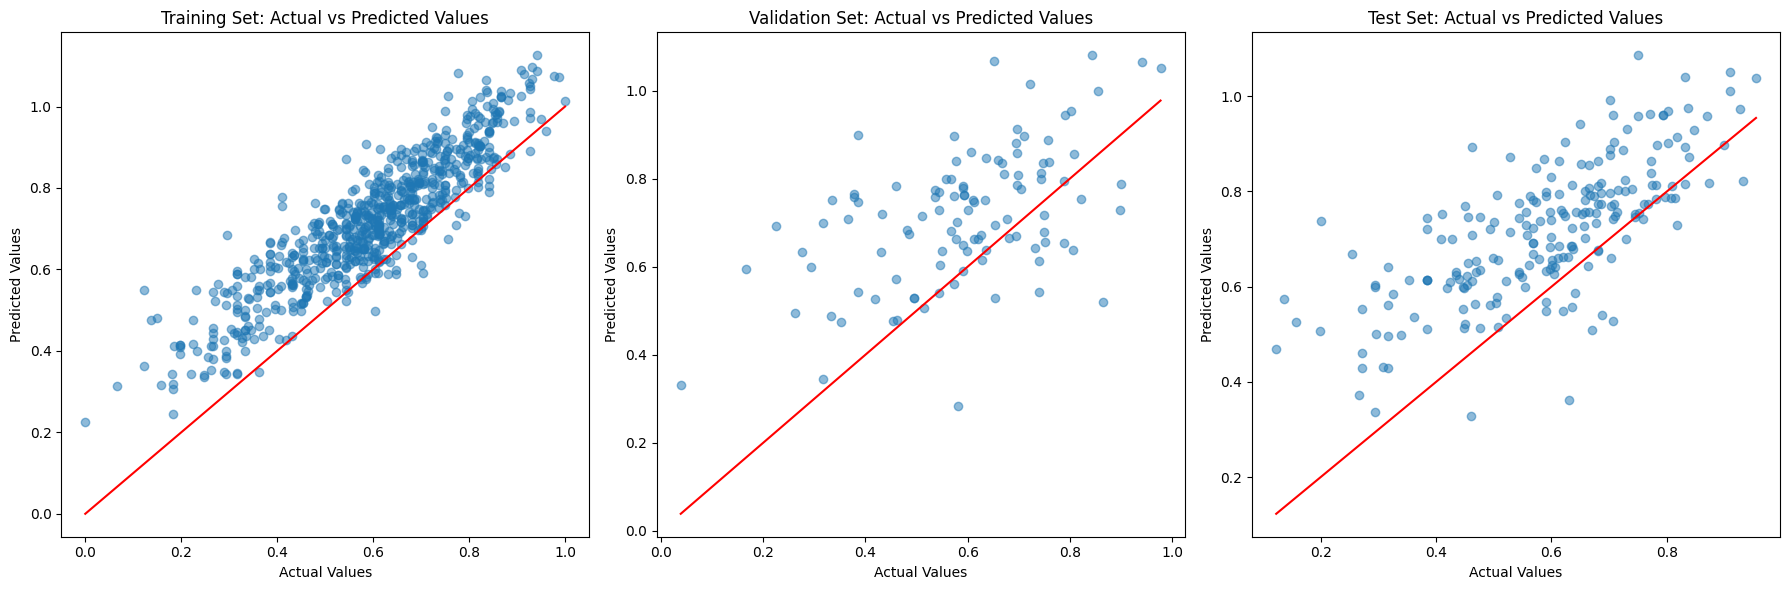

In [ ]:
# Plotting training predictions vs actual values
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.scatter(train_y, train_preds, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Training Set: Actual vs Predicted Values')
plt.plot([min(train_y), max(train_y)], [min(train_y), max(train_y)], color='red')

# Plotting validation predictions vs actual values
plt.subplot(1, 3, 2)
plt.scatter(val_y, val_preds, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Validation Set: Actual vs Predicted Values')
plt.plot([min(val_y), max(val_y)], [min(val_y), max(val_y)], color='red')

# Plotting test predictions vs actual values
plt.subplot(1, 3, 3)
plt.scatter(test_y, test_preds, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Test Set: Actual vs Predicted Values')
plt.plot([min(test_y), max(test_y)], [min(test_y), max(test_y)], color='red')

plt.tight_layout()
plt.show()

In [ ]:
model.fit(train_dataset, nb_epoch=100)

0.0011964062601327896

In [ ]:
# Evaluate GCN model
gcn_train_scores = model.evaluate(train_dataset, metrics=[dc.metrics.Metric(pearson_r2_score)])
gcn_val_scores = model.evaluate(valid_dataset, metrics=[dc.metrics.Metric(pearson_r2_score)])
gcn_test_scores = model.evaluate(test_dataset, metrics=[dc.metrics.Metric(pearson_r2_score)])

print("GCN Train Scores:", gcn_train_scores)
print("GCN Validation Scores:", gcn_val_scores)
print("GCN Test Scores:", gcn_test_scores)

GCN Train Scores: {'pearson_r2_score': 0.005903125502690432}
GCN Validation Scores: {'pearson_r2_score': 0.00573918957647042}
GCN Test Scores: {'pearson_r2_score': 0.008292730506945343}


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np

# Get predictions
train_preds = model.predict(train_dataset)
val_preds = model.predict(valid_dataset)
test_preds = model.predict(test_dataset)

# Calculate MSE and RMSE
def calculate_metrics(true_values, predictions):
    mse = mean_squared_error(true_values, predictions)
    rmse = np.sqrt(mse)
    return mse, rmse

train_mse, train_rmse = calculate_metrics(train_targets, train_preds)
val_mse, val_rmse = calculate_metrics(valid_targets, val_preds)
test_mse, test_rmse = calculate_metrics(test_targets, test_preds)

print(f"Training Set - MSE: {train_mse:.4f}, RMSE: {train_rmse:.4f}")
print(f"Validation Set - MSE: {val_mse:.4f}, RMSE: {val_rmse:.4f}")
print(f"Test Set - MSE: {test_mse:.4f}, RMSE: {test_rmse:.4f}")

Training Set - MSE: 0.0011, RMSE: 0.0325
Validation Set - MSE: 0.0196, RMSE: 0.1402
Test Set - MSE: 0.0160, RMSE: 0.1264


In [ ]:
train_errors = [mean_squared_error(train_targets, model.predict(train_dataset)) for _ in range(10)]
val_errors = [mean_squared_error(valid_targets, model.predict(valid_dataset)) for _ in range(10)]
test_errors = [mean_squared_error(test_targets, model.predict(test_dataset)) for _ in range(10)]

train_mse_ci = calculate_confidence_interval(train_errors)
val_mse_ci = calculate_confidence_interval(val_errors)
test_mse_ci = calculate_confidence_interval(test_errors)

print(f"Training Set - MSE: {train_mse:.4f}, RMSE: {train_rmse:.4f}, 95% CI: {train_mse_ci}")
print(f"Validation Set - MSE: {val_mse:.4f}, RMSE: {val_rmse:.4f}, 95% CI: {val_mse_ci}")
print(f"Test Set - MSE: {test_mse:.4f}, RMSE: {test_rmse:.4f}, 95% CI: {test_mse_ci}")

Training Set - MSE: 0.0011, RMSE: 0.0325, 95% CI: (0.0010590484600845453, 0.0010590484600845453)
Validation Set - MSE: 0.0196, RMSE: 0.1402, 95% CI: (0.019646141240012967, 0.019646141240012974)
Test Set - MSE: 0.0160, RMSE: 0.1264, 95% CI: (0.01597247675650456, 0.01597247675650456)


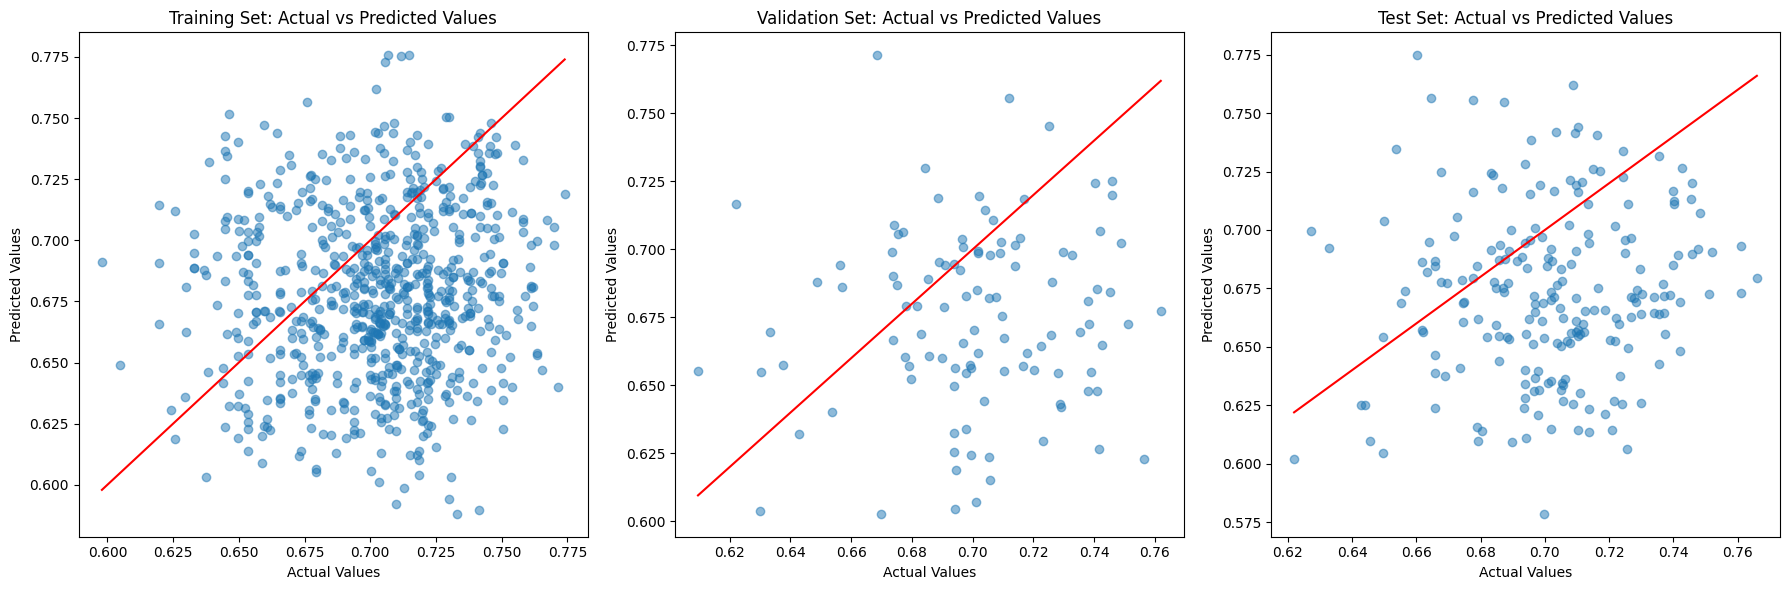

In [ ]:
import matplotlib.pyplot as plt

# Get predictions
train_preds = model.predict(train_dataset)
val_preds = model.predict(valid_dataset)
test_preds = model.predict(test_dataset)

# Reverse the transformation for predictions and actual values
# Note: Ensure you have used the correct normalization transformer or similar for untransform
transformer = dc.trans.NormalizationTransformer(transform_y=True, dataset=train_dataset)
train_preds = transformer.untransform(train_preds)
val_preds = transformer.untransform(val_preds)
test_preds = transformer.untransform(test_preds)
train_y = transformer.untransform(train_dataset.y)
val_y = transformer.untransform(valid_dataset.y)
test_y = transformer.untransform(test_dataset.y)

# Plotting training predictions vs actual values
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.scatter(train_y, train_preds, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Training Set: Actual vs Predicted Values')
plt.plot([min(train_y), max(train_y)], [min(train_y), max(train_y)], color='red')

# Plotting validation predictions vs actual values
plt.subplot(1, 3, 2)
plt.scatter(val_y, val_preds, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Validation Set: Actual vs Predicted Values')
plt.plot([min(val_y), max(val_y)], [min(val_y), max(val_y)], color='red')

# Plotting test predictions vs actual values
plt.subplot(1, 3, 3)
plt.scatter(test_y, test_preds, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Test Set: Actual vs Predicted Values')
plt.plot([min(test_y), max(test_y)], [min(test_y), max(test_y)], color='red')

plt.tight_layout()
plt.show()
